<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="GL-2.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=24px>
                    <b>Insurance Claim Prediction
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

## Problem Statement
A key challenge for the insurance industry is to charge each customer an appropriate premium for the risk they represent. The ability to predict a correct claim amount has a significant impact on insurer's management decisions and financial statements. Predicting the cost of claims in an insurance company is a real-life problem that needs to be solved in a more accurate and automated way. Several factors determine the cost of claims based on health factors like BMI, age, smoker, health conditions and others. Insurance companies apply numerous techniques for analyzing and predicting health insurance costs

## Data Definition

**age** : Age of the policyholder (Numeric)

**sex:** Gender of policyholder (Categoric)

**weight:** Weight of the policyholder (Numeric)

**bmi**: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight (Numeric)

**no_of_dependents:** Number of dependent persons on the policyholder (Numeric)

**smoker:** Indicates policyholder is a smoker or a non-smoker (non-smoker=0;smoker=1) (Categoric)

**claim:** The amount claimed by the policyholder (Numeric)

**bloodpressure:** Bloodpressure reading of policyholder (Numeric)

**diabetes:** Indicates policyholder suffers from diabetes or not (non-diabetic=0; diabetic=1) (Categoric)

**regular_ex:** A policyholder regularly excercises or not (no-excercise=0; excercise=1) (Categoric)

**job_title:** Job profile of the policyholder (Categoric)

**city:** The city in which the policyholder resides (Categoric)

**hereditary_diseases:**  A policyholder suffering from a hereditary diseases or not (Categoric)

<a id='import_lib'></a>
## 1. Import Libraries

In [1]:
# supress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# 'Os' module provides functions for interacting with the operating system 
import os

# 'Pandas' is used for data manipulation and analysis
import pandas as pd 

# 'Numpy' is used for mathematical operations on large, multi-dimensional arrays and matrices
import numpy as np

# 'Matplotlib' is a data visualization library for 2D and 3D plots, built on numpy
import matplotlib.pyplot as plt
%matplotlib inline

# 'Seaborn' is based on matplotlib; used for plotting statistical graphics
import seaborn as sns

# 'Scikit-learn' (sklearn) emphasizes various regression, classification and clustering algorithms
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, Lasso,ElasticNet
from sklearn.model_selection import GridSearchCV

# 'Statsmodels' is used to build and analyze various statistical models
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.tools.eval_measures import rmse
from statsmodels.compat import lzip
from statsmodels.graphics.gofplots import ProbPlot
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF

# 'SciPy' is used to perform scientific computations
from scipy.stats import f_oneway
from scipy.stats import jarque_bera
from scipy import stats

<a id='set_options'></a>
## 2. Set Options

In [2]:
# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None

# return an output value upto 6 decimals
pd.options.display.float_format = '{:.2f}'.format

<a id='Read_Data'></a>
## 3. Read Data

In [3]:
# read csv file using pandas
df_insurance = pd.read_csv("healthinsurance.csv")

# display the top 5 rows of the dataframe
df_insurance.head()

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim
0,60.00,male,64,24.30,NoDisease,1,0,NewYork,72,0,0,Actor,13112.60
1,49.00,female,75,22.60,NoDisease,1,0,Boston,78,1,1,Engineer,9567.00
2,32.00,female,64,17.80,Epilepsy,2,1,Phildelphia,88,1,1,Academician,32734.20
3,61.00,female,53,36.40,NoDisease,1,1,Pittsburg,72,1,0,Chef,48517.60
4,19.00,female,50,20.60,NoDisease,0,0,Buffalo,82,1,0,HomeMakers,1731.70


<a id='data_preparation'></a>
## 4. Data Analysis and Preparation


<a id='Data_Understanding'></a>
### 4.1 Understand the Dataset

<a id='Data_Shape'></a>
### 4.1.1 Data Dimension

In [4]:
df_insurance.shape

(15000, 13)

### 4.1.2 Data Types


**1. Check data types**

In [5]:
df_insurance.dtypes

age                    float64
sex                     object
weight                   int64
bmi                    float64
hereditary_diseases     object
no_of_dependents         int64
smoker                   int64
city                    object
bloodpressure            int64
diabetes                 int64
regular_ex               int64
job_title               object
claim                  float64
dtype: object

**2. Change the incorrect data types**

In [6]:
# use .astype() to change the data type
# convert numerical variables to categorical  

# convert numeric variable 'smoker' to object (categorical) variable
df_insurance.smoker = df_insurance.smoker.astype('object')

# convert numeric variable 'diabetes' to object (categorical) variable
df_insurance.diabetes = df_insurance.diabetes.astype('object')

# convert 'regular_ex' variable diabetes to object (categorical) variable
df_insurance.regular_ex = df_insurance.regular_ex.astype('object')

**3. Recheck the data types after the conversion**

In [7]:
# recheck the data types using .dtypes
df_insurance.dtypes

age                    float64
sex                     object
weight                   int64
bmi                    float64
hereditary_diseases     object
no_of_dependents         int64
smoker                  object
city                    object
bloodpressure            int64
diabetes                object
regular_ex              object
job_title               object
claim                  float64
dtype: object

Note the data types are now as per the data definition. Now we can proceed with the analysis.

<a id='Summary_Statistics'></a>
### 4.1.3 Summary Statistics

In [8]:
# describe the numerical data
df_insurance.describe()

,age,weight,bmi,no_of_dependents,bloodpressure,claim
count,14604.00,15000.00,14044.00,15000.00,15000.00,15000.00
mean,39.55,64.91,30.27,1.13,68.65,13401.44
std,14.02,13.70,6.12,1.23,19.42,12148.24
min,18.00,34.00,16.00,0.00,0.00,1121.90
25%,27.00,54.00,25.70,0.00,64.00,4846.90
50%,40.00,63.00,29.40,1.00,71.00,9545.65
75%,52.00,76.00,34.40,2.00,80.00,16519.12
max,64.00,95.00,53.10,5.00,122.00,63770.40


**2. For categorical features, we use .describe(include=object)**

In [9]:
# describe the categorical data
# include=object: selects the categorical features
df_insurance.describe(include = object)


,sex,hereditary_diseases,smoker,city,diabetes,regular_ex,job_title
count,15000,15000,15000,15000,15000,15000,15000
unique,2,10,2,91,2,2,35
top,female,NoDisease,0,NewOrleans,1,0,Student
freq,7652,13998,12028,302,11655,11638,1320


<a id='Missing_Values'></a>
### 4.1.4 Missing Values

In [10]:
# Find total missing values
Total = df_insurance.isnull().sum().sort_values(ascending=False) 
Total

bmi                    956
age                    396
sex                      0
weight                   0
hereditary_diseases      0
no_of_dependents         0
smoker                   0
city                     0
bloodpressure            0
diabetes                 0
regular_ex               0
job_title                0
claim                    0
dtype: int64

In [11]:
# Find percent missing values
Percent = (df_insurance.isnull().sum()*100/df_insurance.isnull().count()).sort_values(ascending=False)   

# concat the 'Total' and 'Percent' columns using 'concat' function
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])

# print the missing data
missing_data

,Total,Percentage of Missing Values
bmi,956,6.37
age,396,2.64
sex,0,0.00
weight,0,0.00
hereditary_diseases,0,0.00
no_of_dependents,0,0.00
smoker,0,0.00
city,0,0.00
bloodpressure,0,0.00
diabetes,0,0.00


The missing values are present in the data for the `age` and `bmi` variables. There are 396 (2.6%) missing values for the variable `age` and 956 (6.4%) missing values for the variable `bmi`

### Deal with Missing Values

Discuss - How to deal with missing data?<br>


In [12]:
# check the average age for male and female

df_insurance['age'].groupby(df_insurance['sex'], axis=0).mean()

sex
female   39.36
male     39.74
Name: age, dtype: float64

The average age for the male and female is nearly the same. We will fill in missing values with the mean age of the policyholder.

In [13]:
# fill the missing values with the mean value of 'age' using 'fillna()'
df_insurance['age'].fillna(df_insurance['age'].mean(), inplace=True)

Replace missing values by mean for the BMI.

In [14]:
# fill the missing values with the mean value of 'bmi' using 'fillna()'

df_insurance['bmi'].fillna(df_insurance['bmi'].mean(), inplace=True)

We have seen that the the minimum bloodpressure is 0, which is absurd. It implies that these are missing values. 
Let us replace these missing values with the median value.

In [15]:
# calculate the median of the bloodpressure using 'median()''
median_bloodpressure = df_insurance['bloodpressure'].median()

# replace zero values by median using 'replace()'
df_insurance['bloodpressure'] = df_insurance['bloodpressure'].replace(0,median_bloodpressure) 

Recheck the summary statistics to confirm the missing value treatment for the variable 'bloodpressure'.

In [16]:
# obtain the summary statistics of numeric variables using 'describe()'
df_insurance.describe()

,age,weight,bmi,no_of_dependents,bloodpressure,claim
count,15000.00,15000.00,15000.00,15000.00,15000.00,15000.00
mean,39.55,64.91,30.27,1.13,72.23,13401.44
std,13.83,13.70,5.92,1.23,11.27,12148.24
min,18.00,34.00,16.00,0.00,40.00,1121.90
25%,27.00,54.00,25.90,0.00,64.00,4846.90
50%,40.00,63.00,29.80,1.00,71.00,9545.65
75%,51.00,76.00,34.10,2.00,80.00,16519.12
max,64.00,95.00,53.10,5.00,122.00,63770.40


To confirm the data is valid, observe the minimum and maximum value of the variable `bloodpressure` is 40

<a id='correlation'></a>
### 4.1.5 Correlation

In [17]:

df_numeric_features = df_insurance.select_dtypes(include=np.number)
df_numeric_features.columns

Index(['age', 'weight', 'bmi', 'no_of_dependents', 'bloodpressure', 'claim'], dtype='object')

In [18]:
# generate the correlation matrix
corr =  df_numeric_features.corr()
corr

,age,weight,bmi,no_of_dependents,bloodpressure,claim
age,1.00,0.28,0.18,0.06,0.02,0.30
weight,0.28,1.00,0.24,0.14,0.02,0.08
bmi,0.18,0.24,1.00,0.05,-0.05,0.20
no_of_dependents,0.06,0.14,0.05,1.00,0.04,0.07
bloodpressure,0.02,0.02,-0.05,0.04,1.00,0.04
claim,0.30,0.08,0.20,0.07,0.04,1.00


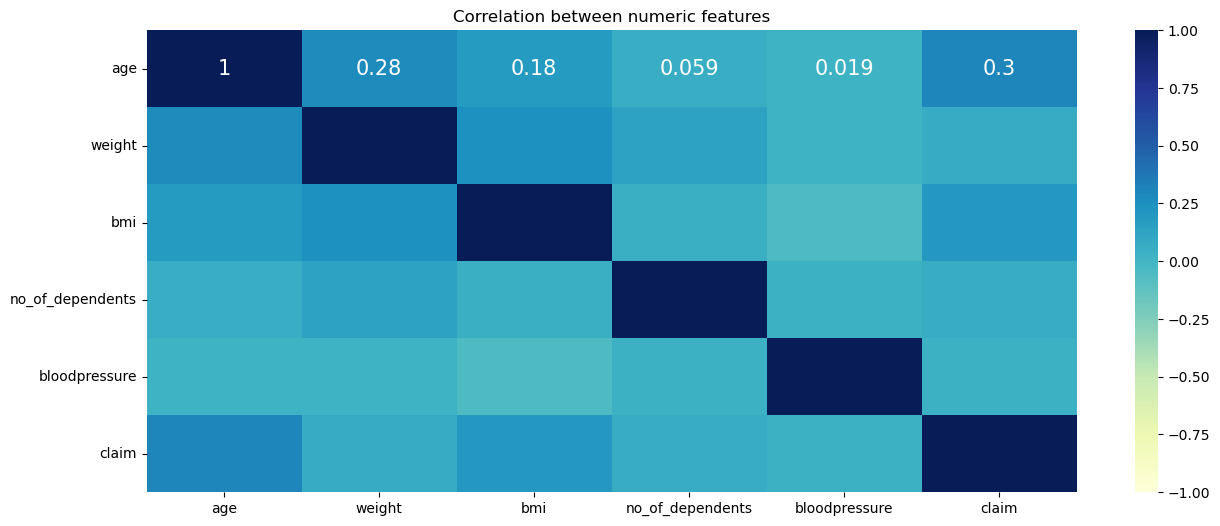

In [19]:
# set the figure size
plt.figure(figsize=(15, 6))

sns.heatmap(corr, cmap='YlGnBu', vmax=1.0, vmin=-1.0, annot = True, annot_kws={"size": 15}, )
plt.title('Correlation between numeric features')
plt.show()

<a id='categorical'></a>
### 4.1.6 Analyze Categorical Variables



In [20]:
df_insurance.describe(include=object)

,sex,hereditary_diseases,smoker,city,diabetes,regular_ex,job_title
count,15000,15000,15000,15000,15000,15000,15000
unique,2,10,2,91,2,2,35
top,female,NoDisease,0,NewOrleans,1,0,Student
freq,7652,13998,12028,302,11655,11638,1320


There are 6 categorical variables. From the output we see that the variable cities has most number of categories. There are 91 cities in the data, of which NewOrleans occurs highes number of times.

Let us visualize the variables. However, we shall exculde the variable `city` from it.

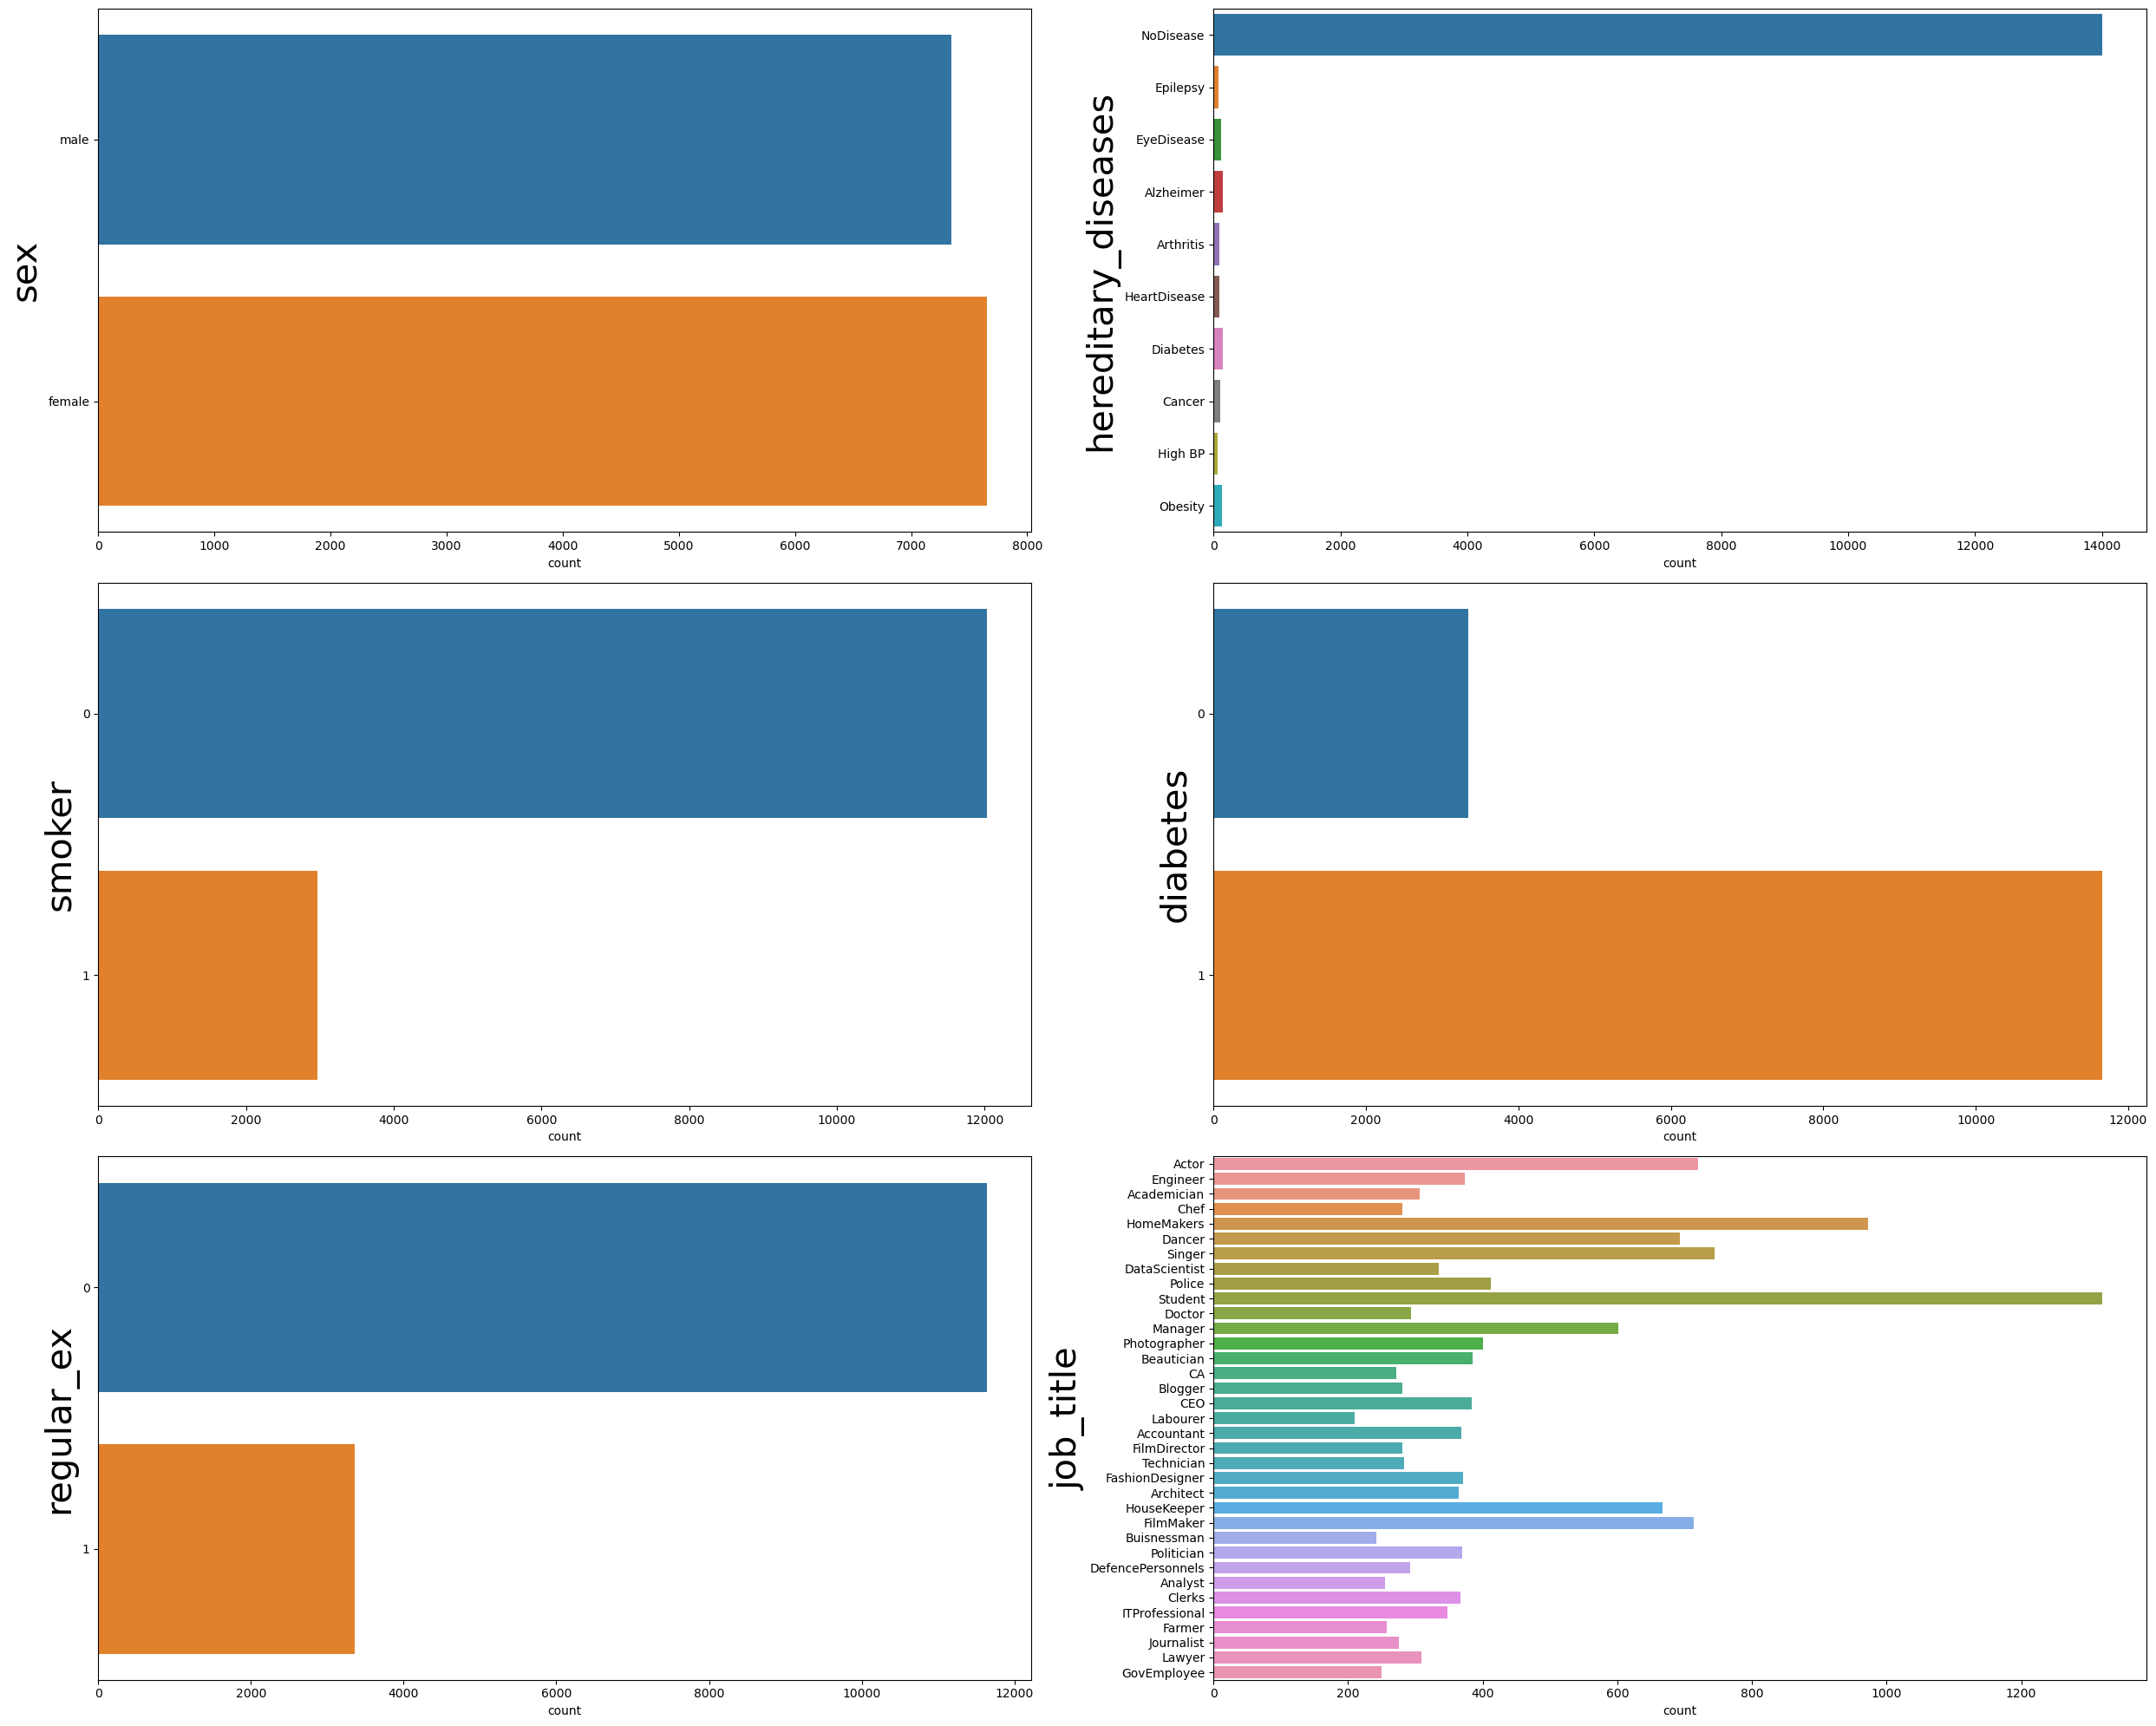

In [21]:
# create a list of all categorical variables
df_categoric_features = df_insurance.select_dtypes(include='object').drop(['city'], axis=1)

# plot the count distribution for each categorical variable 
# 'figsize' sets the figure size
fig, ax = plt.subplots(3, 2, figsize=(25, 20))

# plot a count plot for all the categorical variables
for variable, subplot in zip(df_categoric_features, ax.flatten()):
    
    countplot = sns.countplot(y=df_insurance[variable], ax=subplot )
       
    countplot.set_ylabel(variable, fontsize = 30)

plt.tight_layout()   
plt.show()

Now consider the variable `city`.

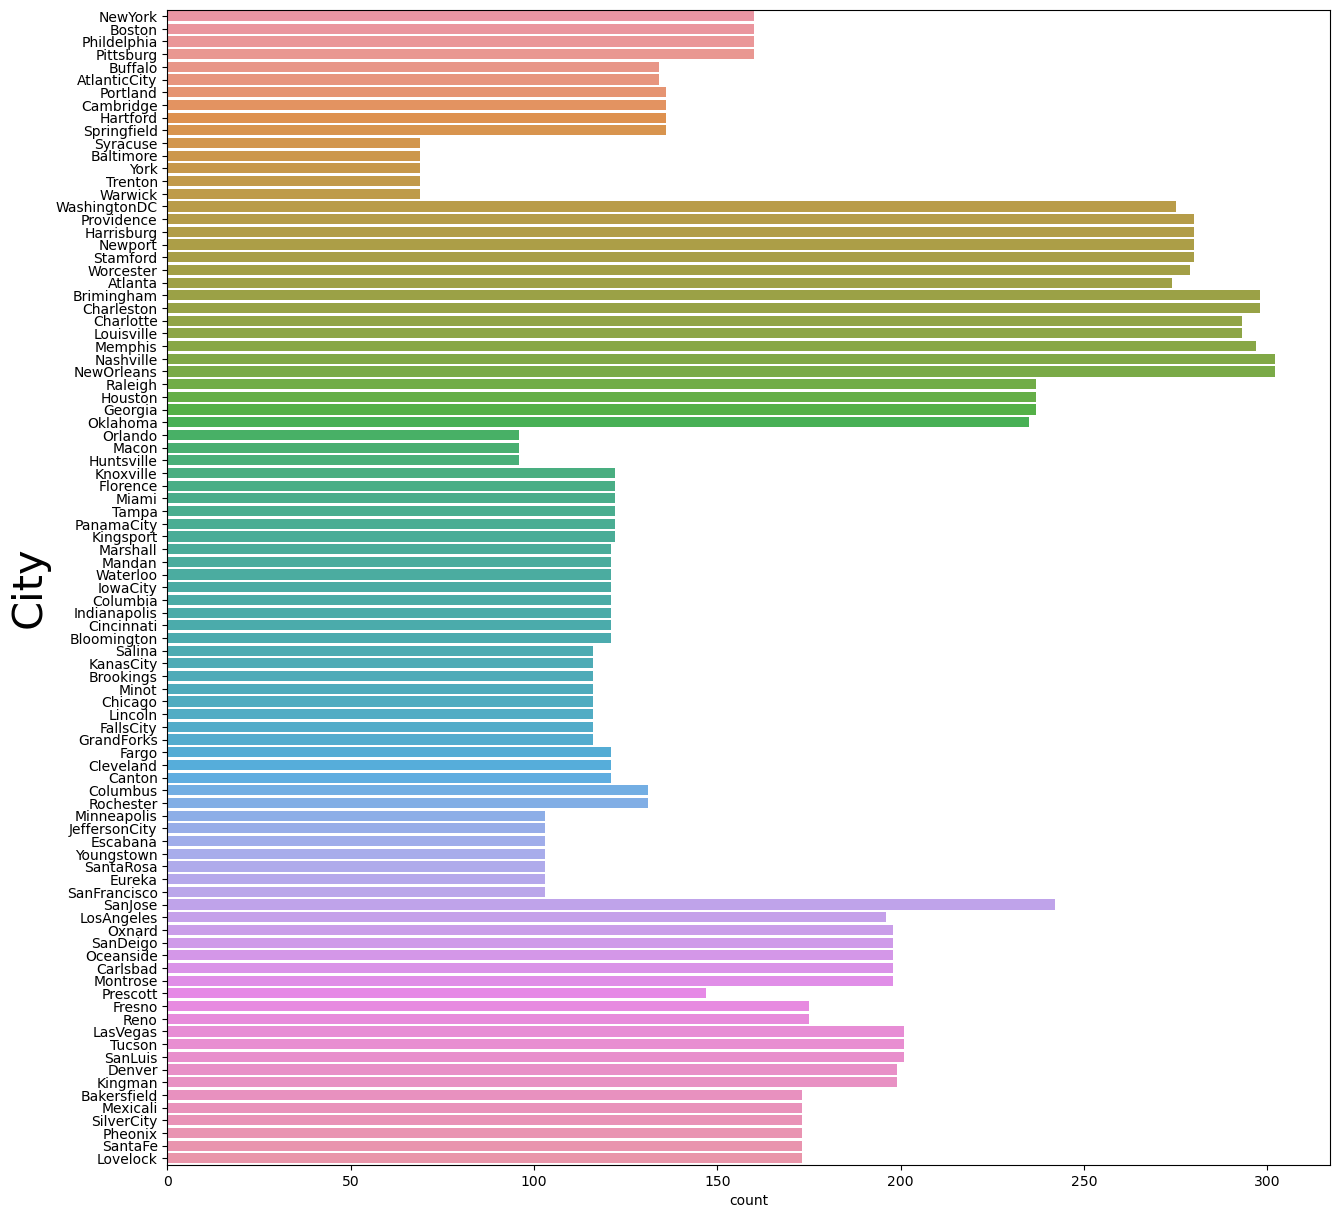

In [22]:
# set the figure size
plt.figure(figsize=(15, 15))
countplot = sns.countplot(y=df_insurance['city'], orient="h")
countplot.set_ylabel('City', fontsize = 30)
plt.show()

### 4.1.7 Analyze Relationship Between Target and Categorical Variables

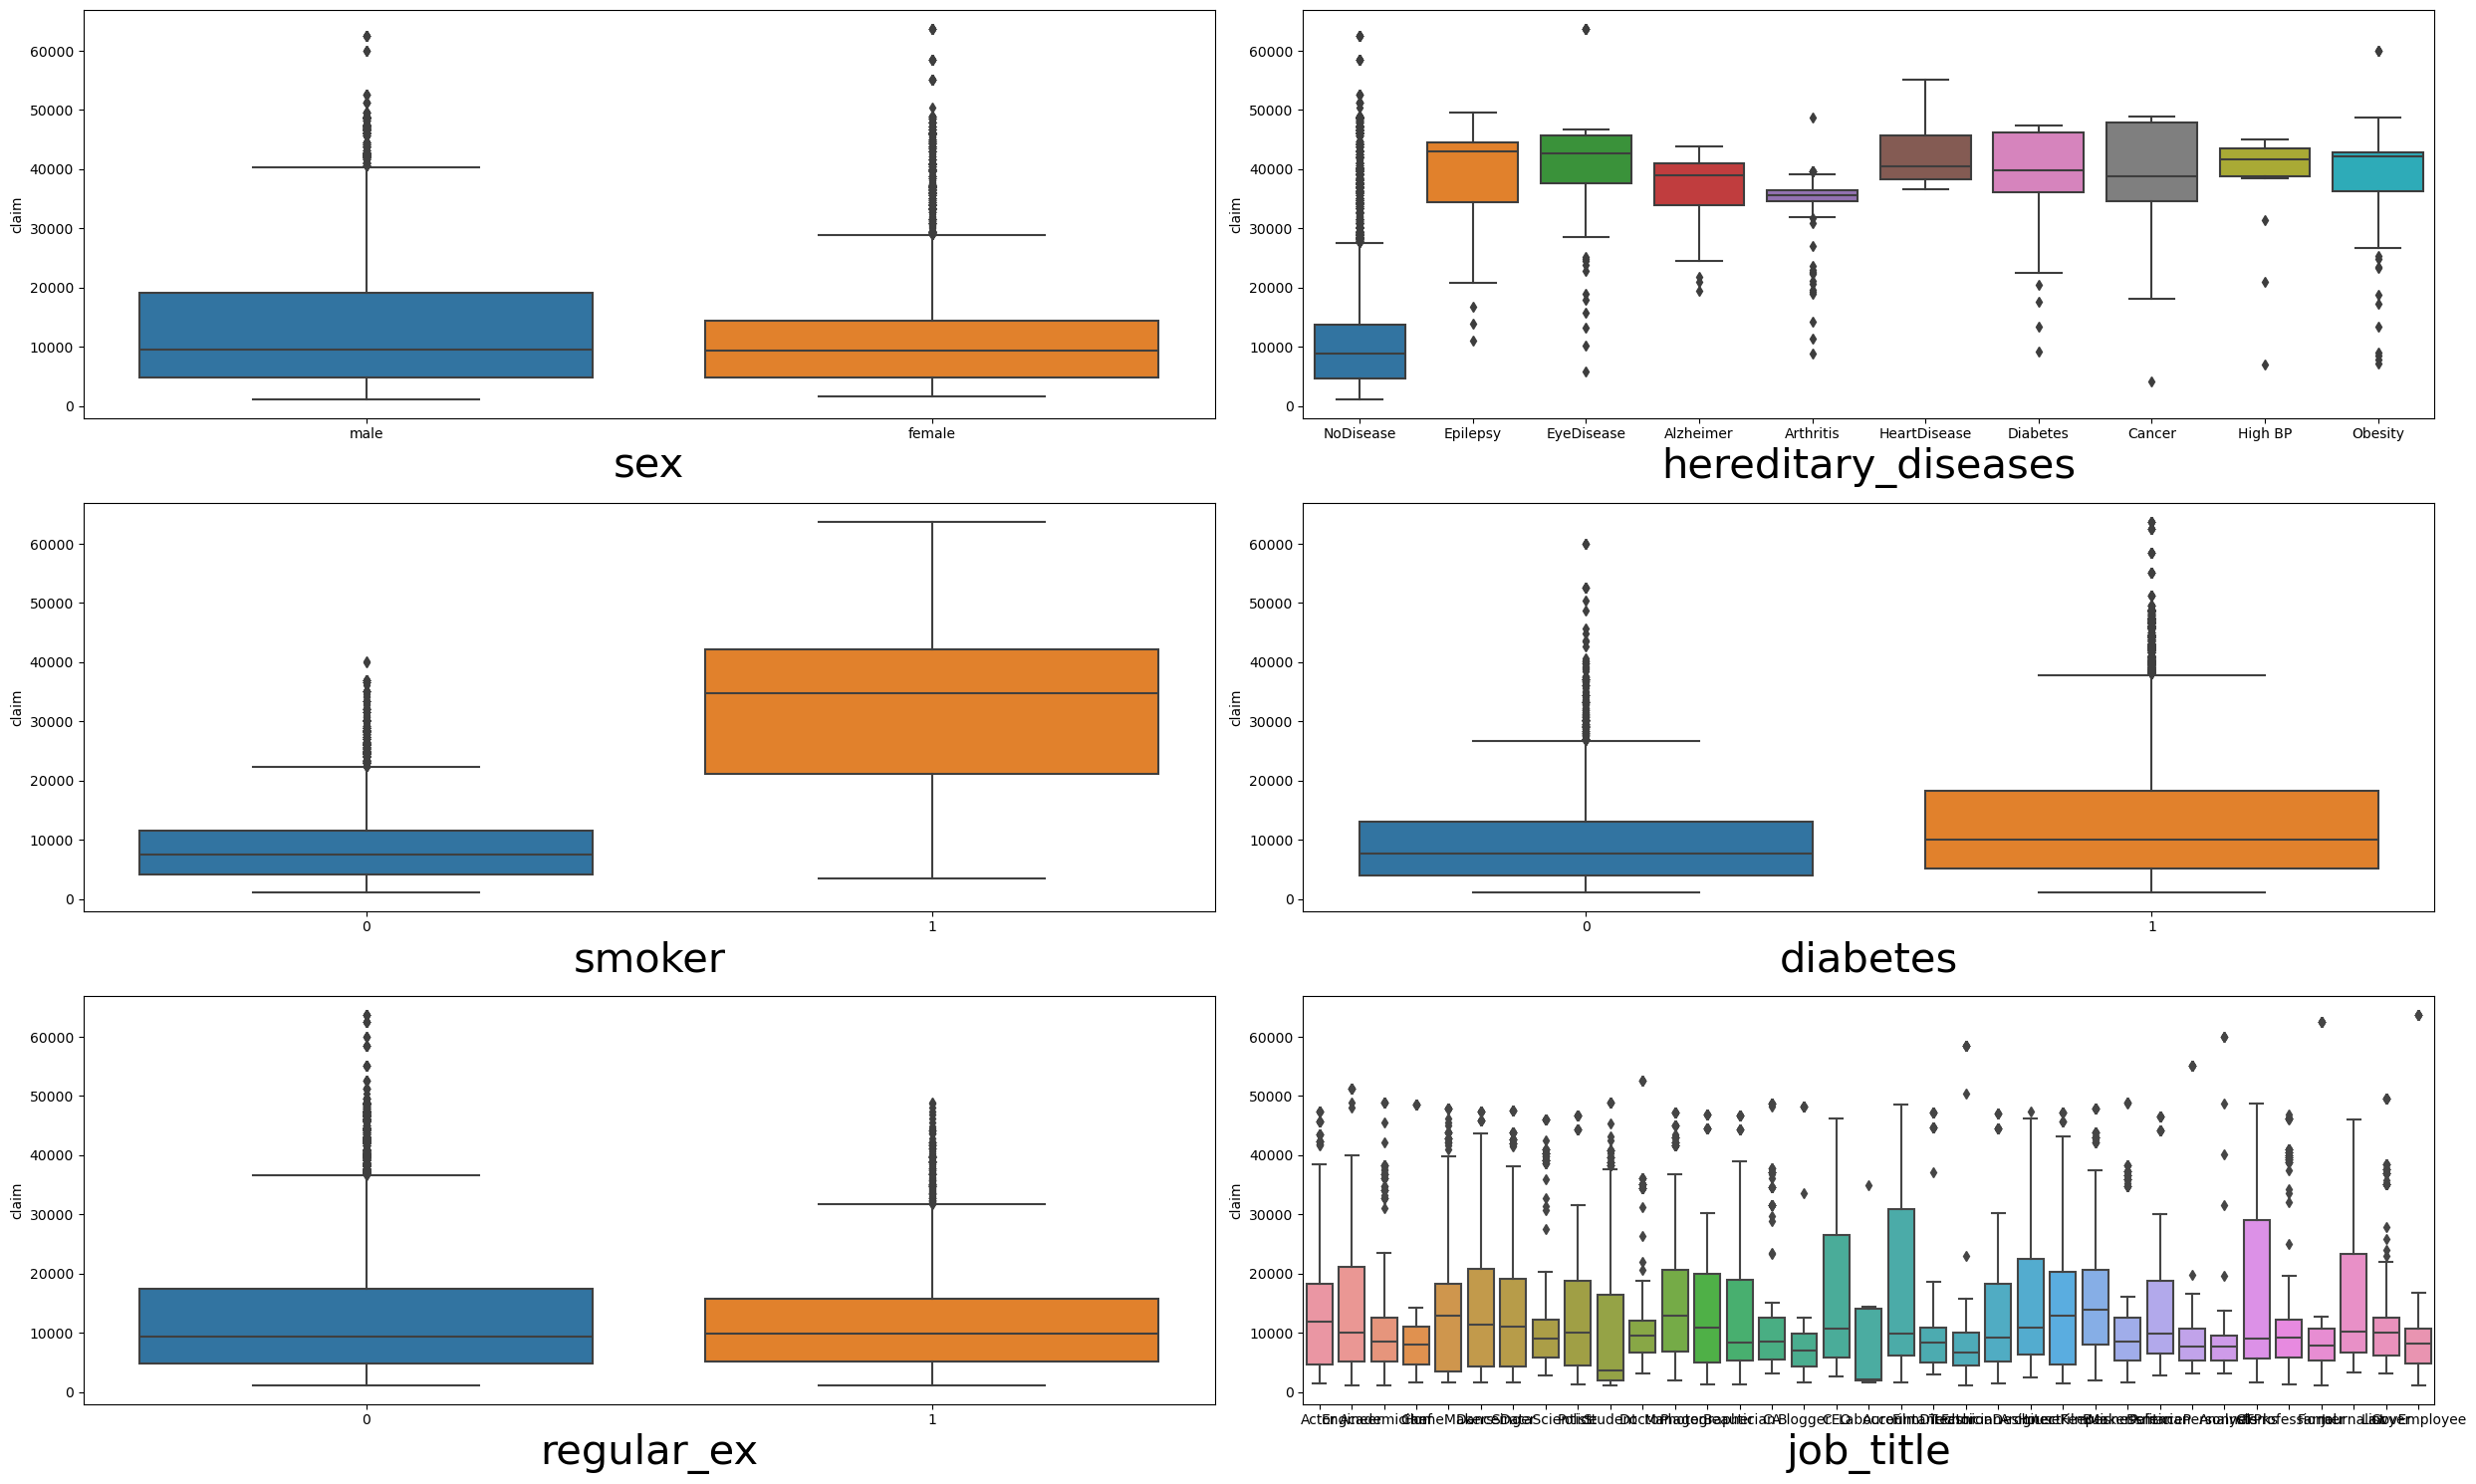

In [23]:
# plot the boxplot for each categorical variable 
# create subplots using subplots()
# 6 subplots in 3 rows and 2 columns
# 'figsize' sets the figure size
fig, ax = plt.subplots(3, 2, figsize=(25, 15))

# plot a boxplot for all the categorical variables 
for variable, subplot in zip(df_categoric_features, ax.flatten()):
    
    # x: variable on x-axis
    # y: variable in y-axis
    # data: dataframe to be used
    # ax: specifies the axes object to draw the plot onto
    boxplt = sns.boxplot(x=variable, y='claim', data=df_insurance, ax=subplot)
    
    # set the x-axis labels 
    # fontsize = 30: sets the font size to 30
    boxplt.set_xlabel(variable, fontsize = 30)

# avoid overlapping of the plots using tight_layout()    
plt.tight_layout()   

# display the plot
plt.show() 

Since the variable `city` has 91 categories, we shall plot it separately.

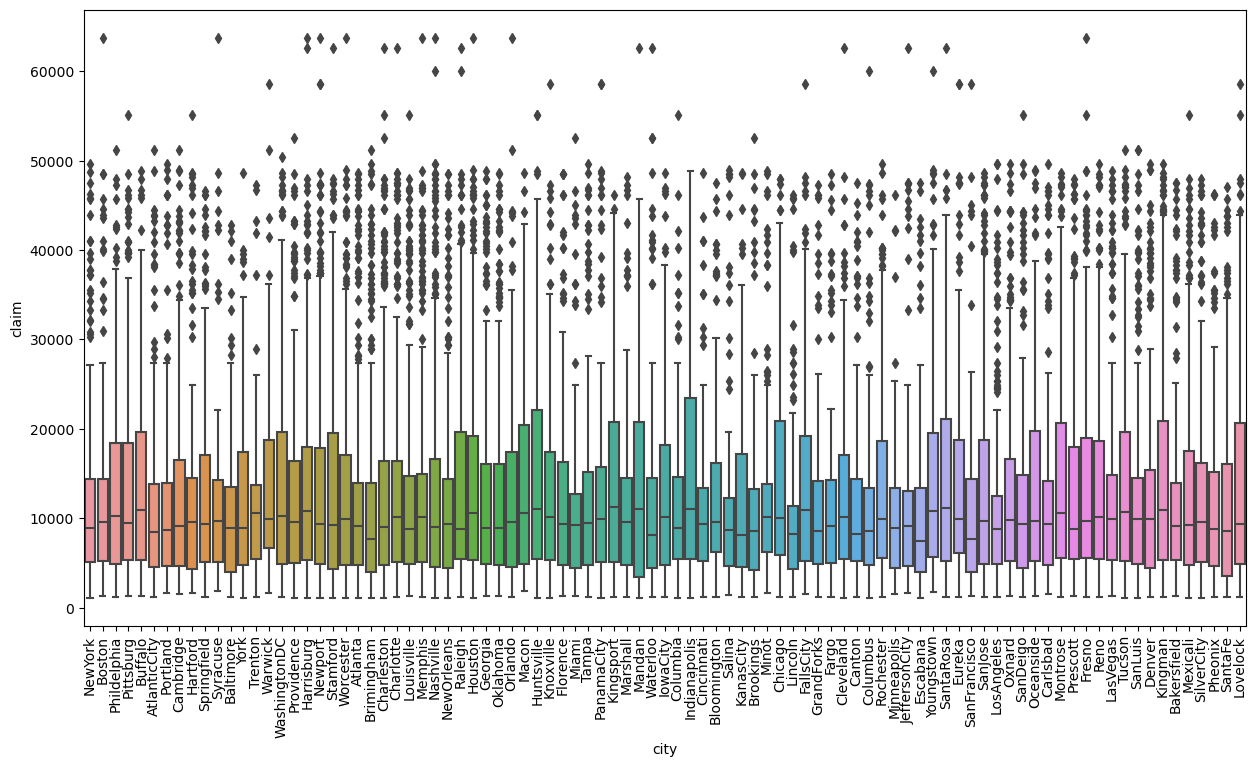

In [24]:
# set the figure size
plt.figure(figsize=(15, 8))

# plot the boxplot for categorical variable 'city'

ax = sns.boxplot(x=df_insurance["city"], y=df_insurance['claim'], data=df_insurance)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize = 10)
plt.show()

<a id='Feature_Engineering'></a>
### 4.1.8 Feature Engineering

Create a new feature 'region' by combining the cities.

**There are 91 unique cities. We will divide these cities into North-East, West, Mid-West, and South regions.**

Let's create a new variable region. We will replace the original variable `city` with it.

In [25]:
# create a region column and combine the north-east cities
df_insurance['region'] = df_insurance['city'].replace(['NewYork', 'Boston', 'Phildelphia', 'Pittsburg', 'Buffalo',
                                                       'AtlanticCity','Portland', 'Cambridge', 'Hartford', 
                                                       'Springfield', 'Syracuse', 'Baltimore', 'York', 'Trenton',
                                                       'Warwick', 'WashingtonDC', 'Providence', 'Harrisburg',
                                                       'Newport', 'Stamford', 'Worcester'],
                                                      'North-East')

In [26]:
# combine all the southern cities into the 'region' column
df_insurance['region'] = df_insurance['region'].replace(['Atlanta', 'Brimingham', 'Charleston', 'Charlotte',
                                                         'Louisville', 'Memphis', 'Nashville', 'NewOrleans',
                                                         'Raleigh', 'Houston', 'Georgia', 'Oklahoma', 'Orlando',
                                                         'Macon', 'Huntsville', 'Knoxville', 'Florence', 'Miami',
                                                         'Tampa', 'PanamaCity', 'Kingsport', 'Marshall'],
                                                         'Southern')

In [27]:
# combine all the mid-west cities into the 'region' column
df_insurance['region'] = df_insurance['region'].replace(['Mandan', 'Waterloo', 'IowaCity', 'Columbia',
                                                         'Indianapolis', 'Cincinnati', 'Bloomington', 'Salina',
                                                         'KanasCity', 'Brookings', 'Minot', 'Chicago', 'Lincoln',
                                                         'FallsCity', 'GrandForks', 'Fargo', 'Cleveland', 
                                                         'Canton', 'Columbus', 'Rochester', 'Minneapolis', 
                                                         'JeffersonCity', 'Escabana','Youngstown'],
                                                         'Mid-West')

In [28]:
# combine all the western cities into the 'region' column
df_insurance['region'] = df_insurance['region'].replace(['SantaRosa', 'Eureka', 'SanFrancisco', 'SanJose',
                                                         'LosAngeles', 'Oxnard', 'SanDeigo', 'Oceanside', 
                                                         'Carlsbad', 'Montrose', 'Prescott', 'Fresno', 'Reno',
                                                         'LasVegas', 'Tucson', 'SanLuis', 'Denver', 'Kingman',
                                                         'Bakersfield', 'Mexicali', 'SilverCity', 'Pheonix',
                                                         'SantaFe', 'Lovelock'],
                                                         'West')

In [29]:
# check the unique values of the region using 'unique()'
df_insurance['region'].unique()

array(['North-East', 'Southern', 'Mid-West', 'West'], dtype=object)

In [30]:
df_insurance['region'].value_counts()

region
Southern      4444
West          4273
North-East    3471
Mid-West      2812
Name: count, dtype: int64

In [31]:
# drop the 'city' variable from the dataset using drop()
df_insurance = df_insurance.drop(['city'], axis=1)

Check whether the new variable added into the data frame or not.

In [32]:
# display the top 5 rows of the dataframe
df_insurance.head()

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,bloodpressure,diabetes,regular_ex,job_title,claim,region
0,60.00,male,64,24.30,NoDisease,1,0,72,0,0,Actor,13112.60,North-East
1,49.00,female,75,22.60,NoDisease,1,0,78,1,1,Engineer,9567.00,North-East
2,32.00,female,64,17.80,Epilepsy,2,1,88,1,1,Academician,32734.20,North-East
3,61.00,female,53,36.40,NoDisease,1,1,72,1,0,Chef,48517.60,North-East
4,19.00,female,50,20.60,NoDisease,0,0,82,1,0,HomeMakers,1731.70,North-East


#### Analyze relationship between region and claim variable

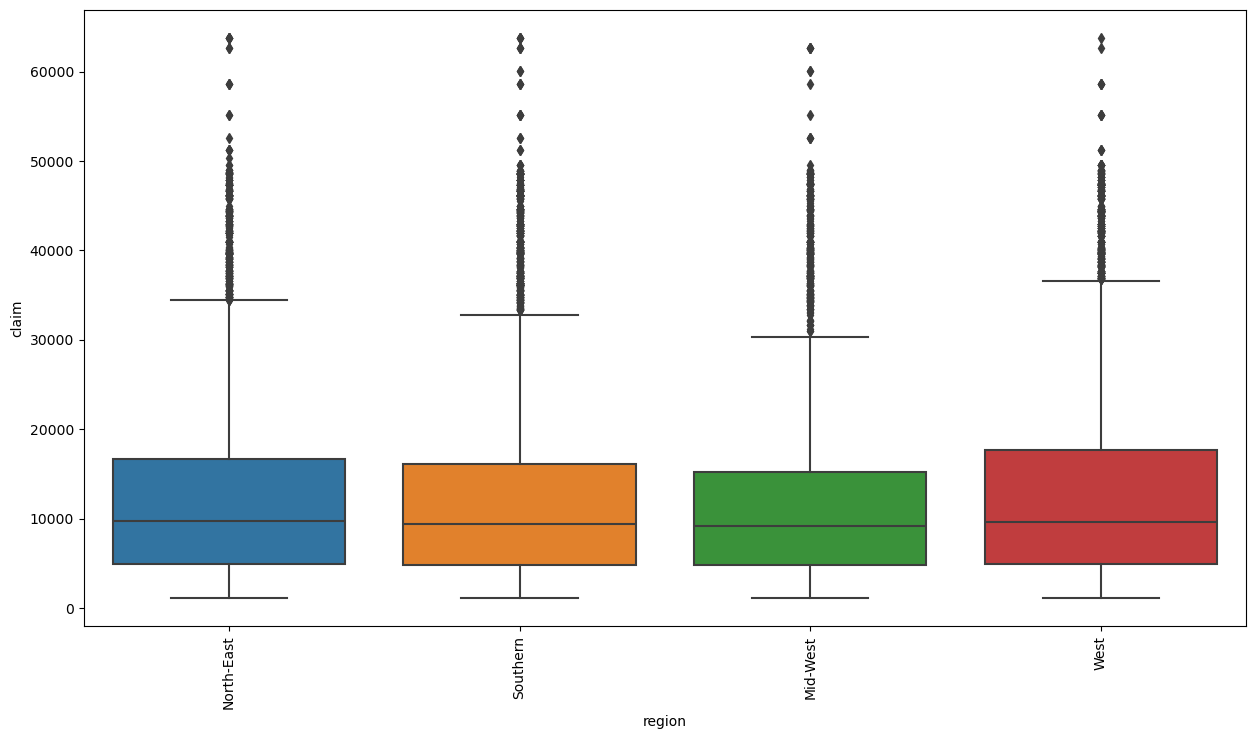

In [33]:
# set figure size
plt.figure(figsize=(15,8))
ax = sns.boxplot(x="region", y="claim", data=df_insurance)
ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=90)
plt.show()

The plot shows that there is not much significant difference in the variance of the insurance claim across the regions.

<a id='outliers'></a>
### 4.1.9 Discover Outliers

**1. Plot boxplot for numerical data**

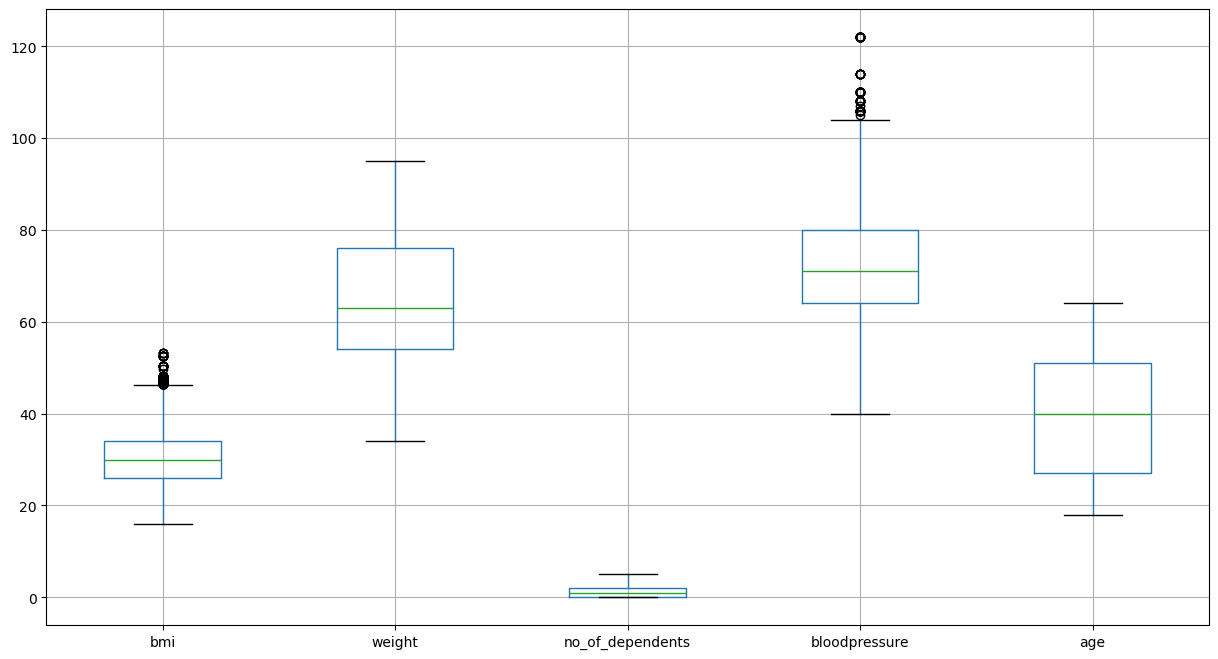

In [34]:
plt.rcParams['figure.figsize']=(15,8)
df_numeric_features.boxplot(column=['bmi', 'weight','no_of_dependents', 'bloodpressure', 'age'])
plt.show()

**2. Note the variables for which outliers are present**

From the above plot, we notice that for the variable 'bmi' and 'bloodpressure' contain outliers

**3. Remove outliers by IQR method**

In [35]:
# calculate interquartile range 

# compute the first quartile using quantile(0.25)
# use .drop() to drop the target variable 
Q1 = df_numeric_features.drop(['claim'], axis=1).quantile(0.25)

# compute the first quartile using quantile(0.75)
# use .drop() to drop the target variable 
Q3 = df_numeric_features.drop(['claim'], axis=1).quantile(0.75)

# calculate of interquartile range 
IQR = Q3 - Q1
print(IQR)
print('*'*75)
print(Q1)
print('*'*75)
print(Q3)

age                24.00
weight             22.00
bmi                 8.20
no_of_dependents    2.00
bloodpressure      16.00
dtype: float64
***************************************************************************
age                27.00
weight             54.00
bmi                25.90
no_of_dependents    0.00
bloodpressure      64.00
Name: 0.25, dtype: float64
***************************************************************************
age                51.00
weight             76.00
bmi                34.10
no_of_dependents    2.00
bloodpressure      80.00
Name: 0.75, dtype: float64


In [36]:
# filter out the outlier values
# ~ : selects all rows which do not satisfy the condition
# |: bitwise operator OR in python
# any() : returns whether any element is True over the columns
# axis : "1" indicates columns should be altered (use "0" for 'index')
df_insurance = df_insurance[~((df_insurance[['age','weight','bmi','no_of_dependents','bloodpressure']] < (Q1 - 1.5 * IQR)) | (df_insurance[['age','weight','bmi','no_of_dependents','bloodpressure']] > (Q3 + 1.5 * IQR))).any(axis=1)]

A simple way to know whether the outliers have been removed or not is to check the dimensions of the data. 

There is a reduction in the number of rows(from 15000 to 14723).

**4. Plot boxplot to recheck for outliers**

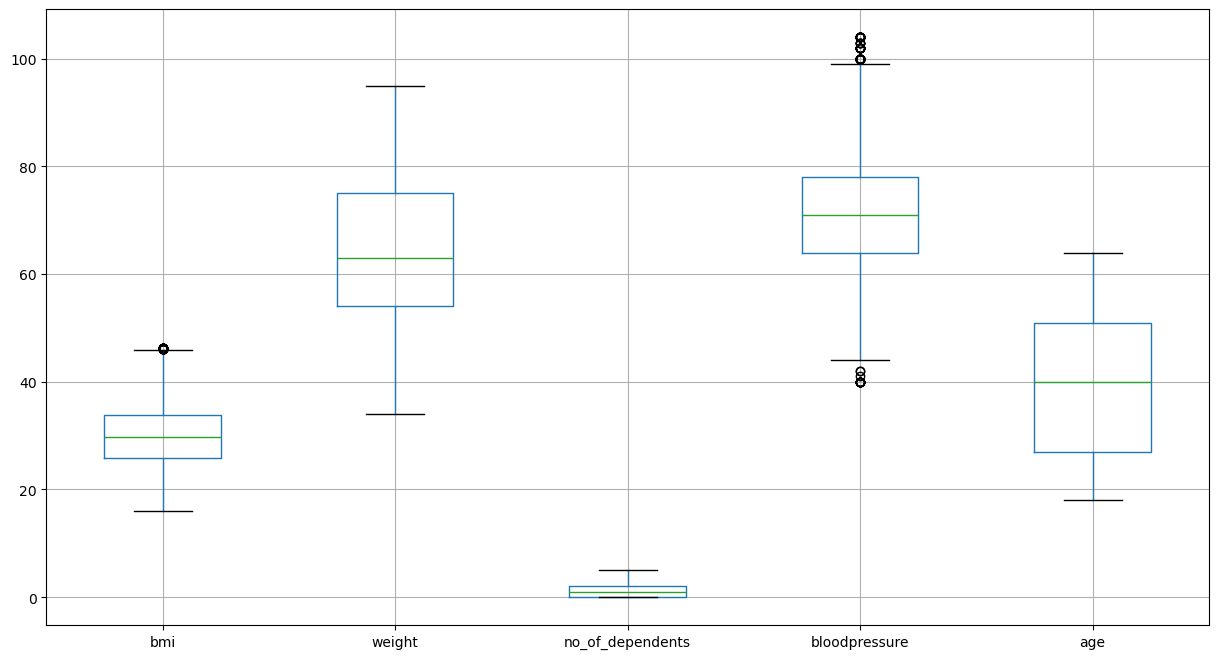

In [37]:
plt.rcParams['figure.figsize']=(15,8)

df_insurance.boxplot(column=['bmi', 'weight','no_of_dependents', 'bloodpressure', 'age'])
plt.show()

Observing the range of the boxplot, we say that the outliers are removed from the original data. The new 'outliers' that you see are moderate outliers that lie within the min/max range before removing the actual outliers

### 4.1.10 Recheck the Correlation

In [38]:
df_numeric_features = df_insurance.select_dtypes(include=np.number)
df_numeric_features.columns

Index(['age', 'weight', 'bmi', 'no_of_dependents', 'bloodpressure', 'claim'], dtype='object')

In [39]:

corr =  df_numeric_features.corr()

# print the correlation matrix
corr

,age,weight,bmi,no_of_dependents,bloodpressure,claim
age,1.00,0.28,0.20,0.06,0.02,0.30
weight,0.28,1.00,0.24,0.13,0.01,0.08
bmi,0.20,0.24,1.00,0.04,-0.06,0.20
no_of_dependents,0.06,0.13,0.04,1.00,0.03,0.08
bloodpressure,0.02,0.01,-0.06,0.03,1.00,0.04
claim,0.30,0.08,0.20,0.08,0.04,1.00


**3. Pass the correlation matrix to the heatmap() function of the seaborn library to plot the heatmap of the correlation matrix**

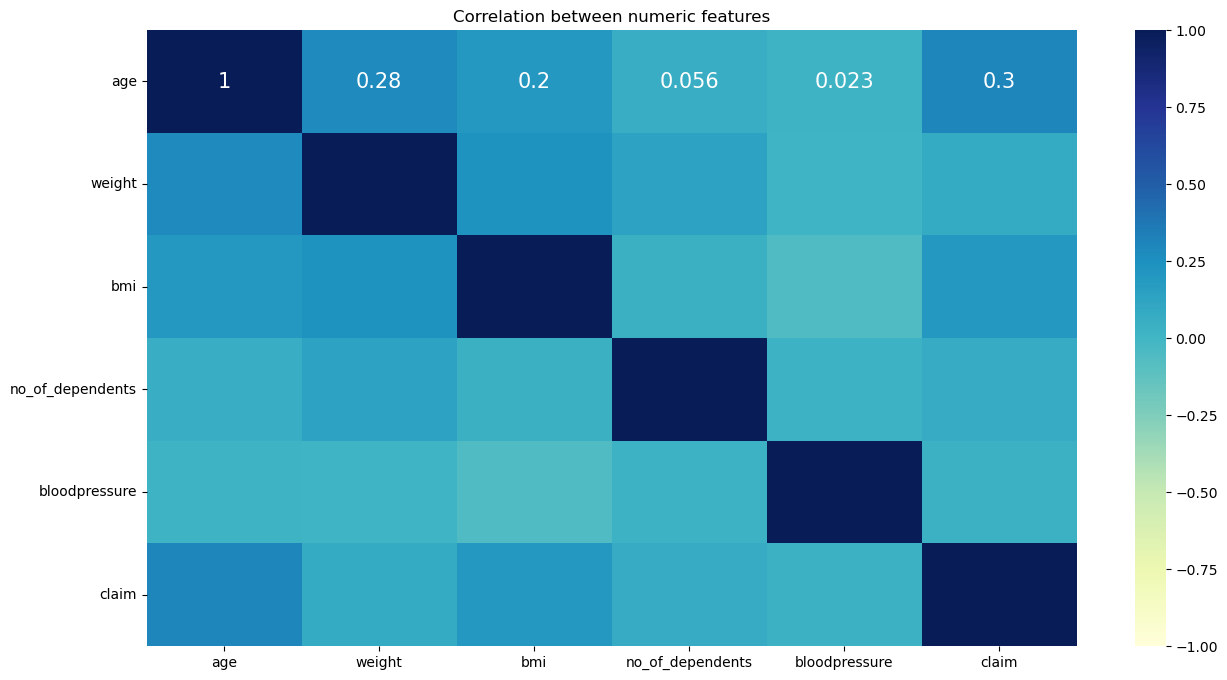

In [40]:
plt.figure(figsize=(15, 8))

sns.heatmap(corr, cmap='YlGnBu', vmax=1.0, vmin=-1.0, annot = True, annot_kws={"size": 15})
plt.title('Correlation between numeric features')
plt.show()

**4. Check multicollinearity using VIF**

In [41]:
df_numeric_X =  df_numeric_features.drop('claim',axis=1)
df_numeric_X = sm.add_constant(df_numeric_X)
vif_value = [VIF(df_numeric_X.values, i) for i in range(df_numeric_X.shape[1])]
pd.DataFrame(vif_value, columns=['VIF_Value'], index=df_numeric_X.columns).sort_values('VIF_Value', ascending=False)

,VIF_Value
const,91.12
weight,1.15
age,1.11
bmi,1.09
no_of_dependents,1.02
bloodpressure,1.01


VIF Values indicate that there is no multi collinearity

<a id='Data_Preparation'></a>
## 4.2 Prepare the Data

<a id='Normality'></a>
### 4.2.1 Check for Normality

As per the assumptions of linear regression, residuals (actual values - predicted values) should be normally distributed. If the target variable is normally distributed then the residuals are also normally distributed, thus we check the normality only for target variable.

**1. Plot a histogram and also perform the Jarque-Bera test**

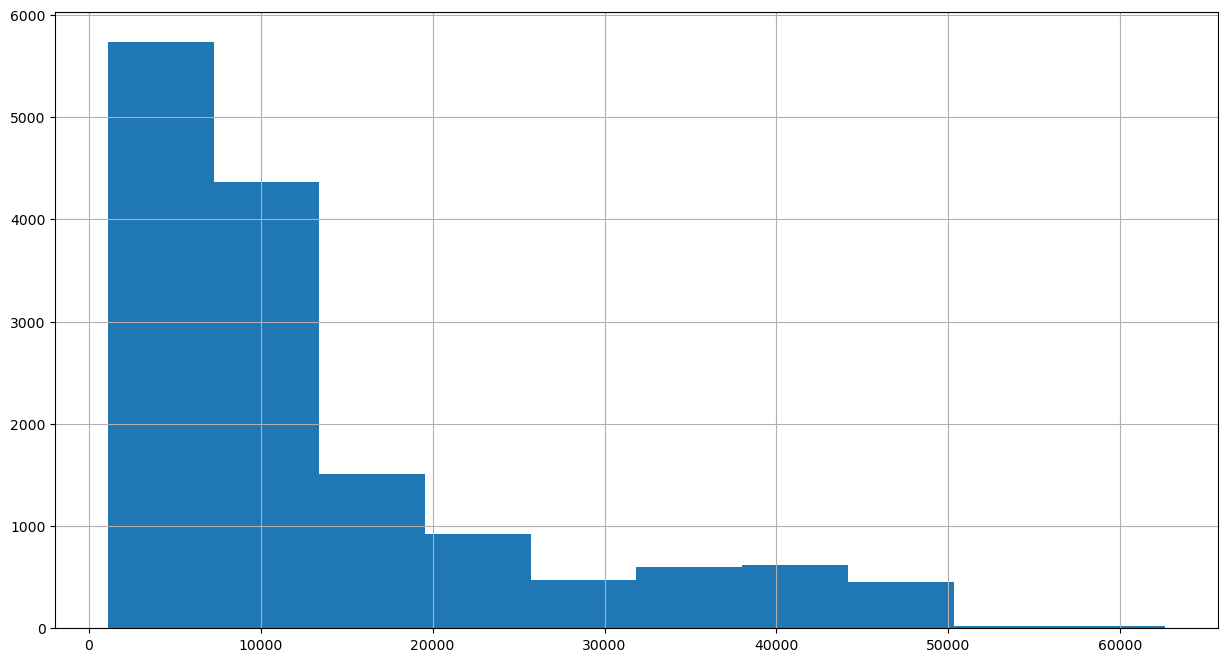

In [42]:
df_insurance.claim.hist()
plt.show()

Let us perform the Jarque-Bera test to check the normality of the target variable.

In [43]:
# normality test using jarque_bera()
#The null and alternate hypothesis of Jarque-Bera test are as follows: <br>
#    H0: The data is normally distributed
#    H1: The data is not normally distributed
# the test returns the the test statistics and the p-value of the test
stat, p = jarque_bera(df_insurance["claim"])
print('Statistics=%.3f, p-value=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('The data is normally distributed (fail to reject H0)')
else:
    print('The data is not normally distributed (reject H0)')

Statistics=6571.030, p-value=0.000
The data is not normally distributed (reject H0)


**2. If the data is not normally distributed, use log transformation to get near normally distributed data**

In [44]:
# log transformation for normality using np.log()
df_insurance['log_claim'] = np.log(df_insurance['claim'])
df_insurance.head()

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,bloodpressure,diabetes,regular_ex,job_title,claim,region,log_claim
0,60.00,male,64,24.30,NoDisease,1,0,72,0,0,Actor,13112.60,North-East,9.48
1,49.00,female,75,22.60,NoDisease,1,0,78,1,1,Engineer,9567.00,North-East,9.17
2,32.00,female,64,17.80,Epilepsy,2,1,88,1,1,Academician,32734.20,North-East,10.40
3,61.00,female,53,36.40,NoDisease,1,1,72,1,0,Chef,48517.60,North-East,10.79
4,19.00,female,50,20.60,NoDisease,0,0,82,1,0,HomeMakers,1731.70,North-East,7.46


**3. Recheck for normality by plotting histogram and performing Jarque-Bera test**


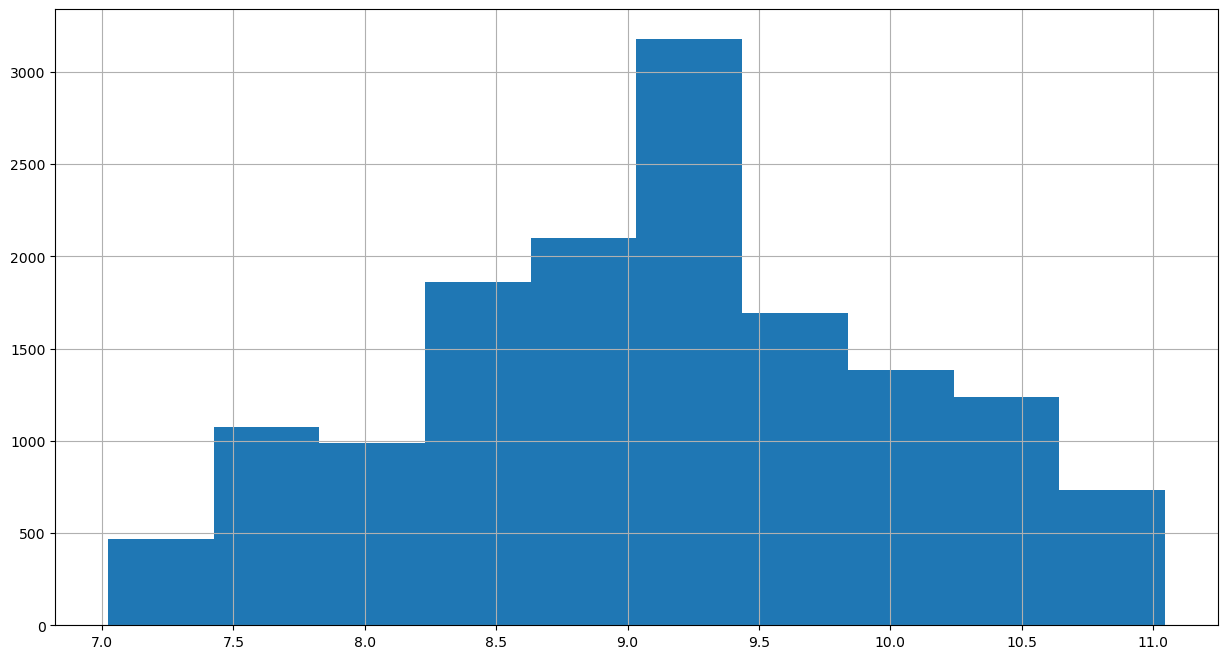

In [45]:
# recheck for normality 
df_insurance.log_claim.hist()
plt.show()

The variable claim is near normally distributed. However we again confirm by Jarque Bera test

Let us perform Jarque Bera test

In [46]:

statn, pv = jarque_bera(df_insurance['log_claim'])
print('Statistics=%.3f, p-value=%.3f' % (statn, pv))
alpha = 0.05
if p > alpha:
    print('The data is normally distributed (fail to reject H0)')
else:
    print('The data is not normally distributed (reject H0)')

Statistics=244.187, p-value=0.000
The data is not normally distributed (reject H0)


It can be visually seen that the data has near-normal distribution, but Jarque Bera test does not support the claim.
Note that in reality it might be very tough for your data to adhere to all assumptions your algorithm needs


### 4.2.2 One-Way Anova 

Perform One-Way ANOVA to compare two means from two independent (unrelated) groups. For example, we apply ANOVA to see whether the mean of claim is significantly different across gender

The null and alternate hypothesis of one-way anova are as follows:

    H0: Population means all are equal
    H1: Population means are not all equal

#### One Way Anova for 'Sex' on 'Claim'

In [47]:
# perform one way anova for sex on claim using f_oneway()
f_oneway(df_insurance['claim'][df_insurance['sex'] == 'male'], 
             df_insurance['claim'][df_insurance['sex'] == 'female'])

F_onewayResult(statistic=68.99835913263617, pvalue=1.070652488972223e-16)

The F-statistic = 68.99 and the p-value < 0.05, which indicates that there is a significant difference in the mean of the insurance claim across gender. We may consider building separate models for each gender. However, in this example we go ahead and build a single model for both genders.

<a id='dummy'></a>
### 4.2.3 Dummy Encoding of Categorical Variables

**1. Filter numerical and categorical variables**

In [48]:
# filter the numerical features in the dataset using select_dtypes()
df_numeric_features = df_insurance.select_dtypes(include=np.number)
df_numeric_features.columns

Index(['age', 'weight', 'bmi', 'no_of_dependents', 'bloodpressure', 'claim',
       'log_claim'],
      dtype='object')

In [49]:
# Perform scaling on numric predictor variables
df_numeric_features.iloc[:, 0:5] = df_numeric_features.iloc[:, 0:5].apply(lambda rec: (rec - rec.mean()) / rec.std())

In [50]:
# filter the categorical features in the dataset using select_dtypes()
df_categoric_features = df_insurance.select_dtypes(include=[object])
df_categoric_features.head()

,sex,hereditary_diseases,smoker,diabetes,regular_ex,job_title,region
0,male,NoDisease,0,0,0,Actor,North-East
1,female,NoDisease,0,1,1,Engineer,North-East
2,female,Epilepsy,1,1,1,Academician,North-East
3,female,NoDisease,1,1,0,Chef,North-East
4,female,NoDisease,0,1,0,HomeMakers,North-East


**2. Dummy encode the catergorical variables**

In [51]:
df_insurance_dummy=pd.get_dummies(df_insurance, drop_first=True)
df_insurance_dummy = df_insurance_dummy.astype(float)
df_insurance_dummy.head()

,age,weight,bmi,no_of_dependents,bloodpressure,claim,log_claim,sex_male,hereditary_diseases_Arthritis,hereditary_diseases_Cancer,hereditary_diseases_Diabetes,hereditary_diseases_Epilepsy,hereditary_diseases_EyeDisease,hereditary_diseases_HeartDisease,hereditary_diseases_High BP,hereditary_diseases_NoDisease,hereditary_diseases_Obesity,smoker_1,diabetes_1,regular_ex_1,job_title_Accountant,job_title_Actor,job_title_Analyst,job_title_Architect,job_title_Beautician,job_title_Blogger,job_title_Buisnessman,job_title_CA,job_title_CEO,job_title_Chef,job_title_Clerks,job_title_Dancer,job_title_DataScientist,job_title_DefencePersonnels,job_title_Doctor,job_title_Engineer,job_title_Farmer,job_title_FashionDesigner,job_title_FilmDirector,job_title_FilmMaker,job_title_GovEmployee,job_title_HomeMakers,job_title_HouseKeeper,job_title_ITProfessional,job_title_Journalist,job_title_Labourer,job_title_Lawyer,job_title_Manager,job_title_Photographer,job_title_Police,job_title_Politician,job_title_Singer,job_title_Student,job_title_Technician,region_North-East,region_Southern,region_West
0,60.00,64.00,24.30,1.00,72.00,13112.60,9.48,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
1,49.00,75.00,22.60,1.00,78.00,9567.00,9.17,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
2,32.00,64.00,17.80,2.00,88.00,32734.20,10.40,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
3,61.00,53.00,36.40,1.00,72.00,48517.60,10.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
4,19.00,50.00,20.60,0.00,82.00,1731.70,7.46,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00


In [52]:
# # create data frame with only categorical variables that have been encoded

# # for all categoric variables create dummy variables
# for col in df_categoric_features.columns.values:
    
#     dummy_encoded_variables = pd.get_dummies(df_categoric_features[col], prefix=col, drop_first=True)
    
#     # concatenate the categoric features with dummy variables using concat()
#     df_categoric_features = pd.concat([df_categoric_features, dummy_encoded_variables],axis=1)
    
#     # drop the orginal categorical variable from the dataframe
#     df_categoric_features.drop([col], axis=1, inplace=True)

**3. Concatenate numerical and dummy encoded categorical variables**

In [53]:
# # concatenate the numerical and dummy encoded categorical variables using concat()
# # axis=1: specifies that the concatenation is column wise
# df_insurance_dummy = pd.concat([df_numeric_features, df_categoric_features], axis=1)

# # display data with dummy variables
# df_insurance_dummy.head()

<a id='LinearRegression'></a>
## 5. Linear Regression (OLS)

<a id='withLog'></a>
### 5.1 Multiple Linear Regression - Full Model - with Log Transformed Dependent Variable (OLS)

**1. Split the data into training and test sets**

In [54]:
# add the intercept column to the dataset
df_insurance_dummy = sm.add_constant(df_insurance_dummy)

# Define X and Y
X = df_insurance_dummy.drop(['claim','log_claim'], axis=1)
y = df_insurance_dummy[['log_claim','claim']]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# check the dimensions of the train & test subset for 
print("The shape of X_train is:",X_train.shape)
print("The shape of X_test is:",X_test.shape)
print("The shape of y_train is:",y_train.shape)
print("The shape of y_test is:",y_test.shape)

The shape of X_train is: (11042, 56)
The shape of X_test is: (3681, 56)
The shape of y_train is: (11042, 2)
The shape of y_test is: (3681, 2)


**2. Build model using sm.OLS().fit()**

In [55]:
# build a full model using OLS()
# consider the log of claim 
linreg_full_model_withlog = sm.OLS(y_train["log_claim"], X_train).fit()

print(linreg_full_model_withlog.summary())

                            OLS Regression Results                            
Dep. Variable:              log_claim   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     584.1
Date:                Fri, 24 May 2024   Prob (F-statistic):               0.00
Time:                        16:47:26   Log-Likelihood:                -7083.9
No. Observations:               11042   AIC:                         1.428e+04
Df Residuals:                   10986   BIC:                         1.469e+04
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

**3. Predict the values using test set**

In [56]:
# predict the 'log_claim' using predict()
linreg_full_model_withlog_predictions = linreg_full_model_withlog.predict(X_test)

In [57]:
# Note that the predicted values are log transformed claim. 
# In order to get claim values, we take the antilog of these predicted values by using the function np.exp()

predicted_claim = np.exp(linreg_full_model_withlog_predictions)


# extract the 'claim' values from the test data
actual_claim = y_test['claim']

**4. Compute accuracy measures**

Now we calculate accuray measures like Root-mean-square-error (RMSE), R-squared and Adjusted R-squared.

In [58]:
# calculate rmse using rmse()
linreg_full_model_withlog_rmse = rmse(actual_claim, predicted_claim)

# calculate R-squared using rsquared
linreg_full_model_withlog_rsquared = linreg_full_model_withlog.rsquared
#linreg_full_model_withlog_test_rsquared = r2_score(actual_claim, predicted_claim)  #if we want test-RSqaured


# calculate Adjusted R-Squared using rsquared_adj
linreg_full_model_withlog_rsquared_adj = linreg_full_model_withlog.rsquared_adj 

linreg_full_model_withlog_rsquared_adj


0.7438857432671903

**5. Tabulate the results**

In [59]:
# create dataframe 'score_card'
# columns: specifies the columns to be selected
score_card = pd.DataFrame(columns=['Model_Name', 'RMSE', 'R-Squared', 'Adj. R-Squared'])
#score_card = pd.DataFrame(columns=['Model_Name', 'R-Squared', 'Adj. R-Squared', 'Test_R-Squared', 'RMSE'])  # for Test-RSquared

# print the score card
score_card





# # Create an initial score_card DataFrame (if it doesn't exist already)
# # Assuming the initial DataFrame is empty with the same columns
# columns = ['Model_Name', 'RMSE', 'R-Squared', 'Adj. R-Squared']
# score_card = pd.DataFrame(columns=columns)

# # Append the new row using pd.concat
# score_card = pd.concat([score_card, linreg_full_model_withlog_metrics_df], ignore_index=True)

# print(score_card)

,Model_Name,RMSE,R-Squared,Adj. R-Squared


In [60]:
linreg_full_model_withlog_rmse = linreg_full_model_withlog_rmse
linreg_full_model_withlog_rsquared = linreg_full_model_withlog_rsquared
linreg_full_model_withlog_rsquared_adj = linreg_full_model_withlog_rsquared_adj

# Compile the required information into a DataFrame
linreg_full_model_withlog_metrics = pd.DataFrame({
    'Model_Name': ["Linreg full model with log of target variable"],
    'RMSE': [linreg_full_model_withlog_rmse],
    'R-Squared': [linreg_full_model_withlog_rsquared],
    'Adj. R-Squared': [linreg_full_model_withlog_rsquared_adj]
    # 'Test_R-Squared': [linreg_full_model_withlog_test_rsquared]    # for Test-RSquared
})

# Create an initial score_card DataFrame (if it doesn't exist already)
# Assuming the initial DataFrame is empty with the same columns
columns = ['Model_Name', 'RMSE', 'R-Squared', 'Adj. R-Squared']
score_card = pd.DataFrame(columns=columns)

# Append the new row using pd.concat
score_card = pd.concat([score_card, linreg_full_model_withlog_metrics], ignore_index=True)

score_card


,Model_Name,RMSE,R-Squared,Adj. R-Squared
0,Linreg full model with log of target variable,7947.41,0.75,0.74


<a id='withoutLog'></a>
### 5.2 Multiple Linear Regression - Full Model - without Log Transformed Dependent Variable (OLS)

**1. Build model using sm.OLS().fit()**

In [61]:
# build a full model using OLS()
linreg_full_model_withoutlog = sm.OLS(y_train['claim'], X_train).fit()

# print the summary output
print(linreg_full_model_withoutlog.summary())

                            OLS Regression Results                            
Dep. Variable:                  claim   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     651.8
Date:                Fri, 24 May 2024   Prob (F-statistic):               0.00
Time:                        16:47:29   Log-Likelihood:            -1.1150e+05
No. Observations:               11042   AIC:                         2.231e+05
Df Residuals:                   10986   BIC:                         2.235e+05
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

#### Calculate the p-values to know the insignificant variables

In [62]:
# calculate the p-values for all the variables
# create a dataframe using pd.DataFrame()
# columns: specifies the column names
linreg_full_model_withoutlog_pvalues = pd.DataFrame(linreg_full_model_withoutlog.pvalues, columns=["P-Value"])

linreg_full_model_withoutlog_pvalues

,P-Value
const,0.03
age,0.00
weight,0.00
bmi,0.00
no_of_dependents,0.00
bloodpressure,0.00
sex_male,0.99
hereditary_diseases_Arthritis,0.01
hereditary_diseases_Cancer,0.44
hereditary_diseases_Diabetes,0.01


The above table shows the p-values for all the variables to decide the significant variables

Let's create a list of insignificant variables

In [63]:
linreg_full_model_withoutlog_pvalues[linreg_full_model_withoutlog_pvalues['P-Value']  <= 0.05]

,P-Value
const,0.03
age,0.00
weight,0.00
bmi,0.00
no_of_dependents,0.00
bloodpressure,0.00
hereditary_diseases_Arthritis,0.01
hereditary_diseases_Diabetes,0.01
hereditary_diseases_EyeDisease,0.01
hereditary_diseases_HeartDisease,0.00


In [64]:
# select insignificant variables
insignificant_variables = linreg_full_model_withoutlog_pvalues[linreg_full_model_withoutlog_pvalues['P-Value']  > 0.05]

# get the position of a specified value
insigni_var = insignificant_variables.index

# convert the list of variables to 'list' type
insigni_var = insigni_var.to_list()

# get the list of insignificant variables
insigni_var

['sex_male',
 'hereditary_diseases_Cancer',
 'hereditary_diseases_Epilepsy',
 'hereditary_diseases_Obesity',
 'job_title_Accountant',
 'job_title_Actor',
 'job_title_Architect',
 'job_title_Beautician',
 'job_title_Blogger',
 'job_title_Buisnessman',
 'job_title_CA',
 'job_title_CEO',
 'job_title_Chef',
 'job_title_Clerks',
 'job_title_Dancer',
 'job_title_DefencePersonnels',
 'job_title_Farmer',
 'job_title_FashionDesigner',
 'job_title_FilmDirector',
 'job_title_FilmMaker',
 'job_title_GovEmployee',
 'job_title_HomeMakers',
 'job_title_HouseKeeper',
 'job_title_ITProfessional',
 'job_title_Journalist',
 'job_title_Labourer',
 'job_title_Lawyer',
 'job_title_Police',
 'job_title_Technician',
 'region_North-East',
 'region_Southern',
 'region_West']

**2. Predict the values using test set**

In [65]:
# predict the claim using predict()
predicted_claim = linreg_full_model_withoutlog.predict(X_test)

# extract the 'claim' values from the test data
actual_claim = y_test['claim']

**3. Compute model accuracy measures**

In [66]:
# calculate rmse using rmse()
linreg_full_model_withoutlog_rmse = rmse(actual_claim, predicted_claim)

# calculate R-squared using rsquared
linreg_full_model_withoutlog_rsquared = linreg_full_model_withoutlog.rsquared
# linreg_full_model_withoutlog_test_rsquared = r2_score(actual_claim, predicted_claim)

# calculate Adjusted R-Squared using rsquared_adj
linreg_full_model_withoutlog_rsquared_adj = linreg_full_model_withoutlog.rsquared_adj 
linreg_full_model_withoutlog_rsquared_adj


0.7642493110241119

**4. Tabulate the results**

In [67]:
# compile the required information
linreg_full_model_withoutlog_metrics = pd.Series({
                     'Model_Name': "Linreg full model without log of target variable",
                     'RMSE':linreg_full_model_withoutlog_rmse,
                     'R-Squared': linreg_full_model_withoutlog_rsquared,
                     'Adj. R-Squared': linreg_full_model_withoutlog_rsquared_adj
                   })

# append our result table using append()
score_card = pd.concat([score_card, linreg_full_model_withlog_metrics], ignore_index=True)
# score_card = score_card.append(linreg_full_model_withoutlog_metrics, ignore_index=True)
score_card

,Model_Name,RMSE,R-Squared,Adj. R-Squared
0,Linreg full model with log of target variable,7947.41,0.75,0.74
1,Linreg full model with log of target variable,7947.41,0.75,0.74


<a id='Finetuning'></a>
## 5.3. Fine Tune Linear Regression Model (OLS)

<a id='RemovingInsignificantVariable'></a>
### 5.3.1 Linear Regression after Removing Insignificant Variable (OLS)


**1. Consider the significant variables**

In [68]:
X_train.head()

,const,age,weight,bmi,no_of_dependents,bloodpressure,sex_male,hereditary_diseases_Arthritis,hereditary_diseases_Cancer,hereditary_diseases_Diabetes,hereditary_diseases_Epilepsy,hereditary_diseases_EyeDisease,hereditary_diseases_HeartDisease,hereditary_diseases_High BP,hereditary_diseases_NoDisease,hereditary_diseases_Obesity,smoker_1,diabetes_1,regular_ex_1,job_title_Accountant,job_title_Actor,job_title_Analyst,job_title_Architect,job_title_Beautician,job_title_Blogger,job_title_Buisnessman,job_title_CA,job_title_CEO,job_title_Chef,job_title_Clerks,job_title_Dancer,job_title_DataScientist,job_title_DefencePersonnels,job_title_Doctor,job_title_Engineer,job_title_Farmer,job_title_FashionDesigner,job_title_FilmDirector,job_title_FilmMaker,job_title_GovEmployee,job_title_HomeMakers,job_title_HouseKeeper,job_title_ITProfessional,job_title_Journalist,job_title_Labourer,job_title_Lawyer,job_title_Manager,job_title_Photographer,job_title_Police,job_title_Politician,job_title_Singer,job_title_Student,job_title_Technician,region_North-East,region_Southern,region_West
1163,1.00,30.00,79.00,43.10,2.00,58.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
5615,1.00,58.00,55.00,24.30,0.00,74.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
10109,1.00,63.00,80.00,36.90,0.00,80.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3256,1.00,18.00,52.00,31.40,0.00,58.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
7087,1.00,40.00,80.00,30.27,4.00,85.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00


In [69]:
# drop the insignificant variables
X_significant = df_insurance.drop(["sex","job_title","region","claim","log_claim"], axis=1)

In [70]:
# filter the categorical features in the dataset using select_dtypes()
df_significant_categoric_features = X_significant.select_dtypes(include=[object])
df_significant_categoric_features.columns

Index(['hereditary_diseases', 'smoker', 'diabetes', 'regular_ex'], dtype='object')

**Dummy encode the catergorical variables**

In [71]:
# create data frame with only categorical variables that have been encoded

# for all categoric variables create dummy variables
for col in df_significant_categoric_features.columns.values:
    
    dummy_encoded_variables = pd.get_dummies(df_significant_categoric_features[col], prefix=col, drop_first=True)
    df_significant_categoric_features = pd.concat([df_significant_categoric_features, dummy_encoded_variables],axis=1)
    df_significant_categoric_features.drop([col], axis=1, inplace=True)

**Concatenate numerical and dummy encoded categorical variables**

In [72]:
# concatenate the numerical and dummy encoded categorical variables using concat()
df_insurance_significant = pd.concat([df_numeric_features, df_significant_categoric_features], axis=1)
df_insurance_significant= df_insurance_significant.astype(float)
df_insurance_significant.head()

,age,weight,bmi,no_of_dependents,bloodpressure,claim,log_claim,hereditary_diseases_Arthritis,hereditary_diseases_Cancer,hereditary_diseases_Diabetes,hereditary_diseases_Epilepsy,hereditary_diseases_EyeDisease,hereditary_diseases_HeartDisease,hereditary_diseases_High BP,hereditary_diseases_NoDisease,hereditary_diseases_Obesity,smoker_1,diabetes_1,regular_ex_1
0,1.47,-0.06,-1.02,-0.10,0.01,13112.60,9.48,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
1,0.68,0.75,-1.32,-0.10,0.57,9567.00,9.17,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,1.00
2,-0.55,-0.06,-2.17,0.72,1.51,32734.20,10.40,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00
3,1.54,-0.86,1.11,-0.10,0.01,48517.60,10.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,1.00,0.00
4,-1.48,-1.08,-1.67,-0.92,0.95,1731.70,7.46,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00


**2. Split the data into training and test sets**

In [73]:
# add the intercept column to the dataset
df_insurance_significant = sm.add_constant(df_insurance_significant)

# separate the independent and dependent variables
X = df_insurance_significant.drop(['claim','log_claim'], axis=1)
y = df_insurance_significant[['log_claim','claim']]

# split data into train subset and test subset for predictor and target variables
X_train_significant, X_test_significant, y_train, y_test = train_test_split(X, y, random_state=1)

print("The shape of X_train is:",X_train_significant.shape)
print("The shape of X_test is:",X_test_significant.shape)
print("The shape of y_train is:",y_train.shape)
print("The shape of y_test is:",y_test.shape)

The shape of X_train is: (11042, 18)
The shape of X_test is: (3681, 18)
The shape of y_train is: (11042, 2)
The shape of y_test is: (3681, 2)


**1. Build model using sm.OLS().fit()**

In [74]:
# build a full model with significant variables using OLS()
linreg_model_with_significant_var = sm.OLS(y_train['claim'], X_train_significant).fit()

# to print the summary output
print(linreg_model_with_significant_var.summary())

                            OLS Regression Results                            
Dep. Variable:                  claim   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     2064.
Date:                Fri, 24 May 2024   Prob (F-statistic):               0.00
Time:                        16:47:29   Log-Likelihood:            -1.1160e+05
No. Observations:               11042   AIC:                         2.232e+05
Df Residuals:                   11024   BIC:                         2.234e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

**2. Predict the values using test set**

In [75]:
# predict the 'claim' using predict()
predicted_claim = linreg_model_with_significant_var.predict(X_test_significant)

# extract the 'claim' values from the test data
actual_claim = y_test['claim']

**3. Compute model accuracy measures**

Now we calculate accuray measures like Root-mean-square-error (RMSE), R-squared and Adjusted R-squared.

In [76]:
# calculate rmse using rmse()
linreg_model_with_significant_var_rmse = rmse(actual_claim, predicted_claim)

# calculate R-squared using rsquared
linreg_model_with_significant_var_rsquared = linreg_model_with_significant_var.rsquared

# calculate Adjusted R-Squared using rsquared_adj
linreg_model_with_significant_var_rsquared_adj = linreg_model_with_significant_var.rsquared_adj 

**4. Tabulate the results**

In [77]:
linreg_model_with_significant_var_rmse = linreg_model_with_significant_var_rmse
linreg_model_with_significant_var_rsquared = linreg_model_with_significant_var_rsquared
linreg_model_with_significant_var_adj = linreg_model_with_significant_var_rsquared_adj

# Compile the required information into a DataFrame
linreg_model_with_significant_var_metrics = pd.DataFrame({
    'Model_Name': ["Linreg full model with significant variables"],
    'RMSE': [linreg_model_with_significant_var_rmse],
    'R-Squared': [linreg_model_with_significant_var_rsquared],
    'Adj. R-Squared': [linreg_model_with_significant_var_rsquared_adj]
    # 'Test_R-Squared': [linreg_full_model_withlog_test_rsquared]    # for Test-RSquared
})

# Create an initial score_card DataFrame (if it doesn't exist already)
# Assuming the initial DataFrame is empty with the same columns
columns = ['Model_Name', 'RMSE', 'R-Squared', 'Adj. R-Squared']
score_card = pd.DataFrame(columns=columns)

# Append the new row using pd.concat
score_card = pd.concat([score_card, linreg_model_with_significant_var_metrics], ignore_index=True)

score_card


,Model_Name,RMSE,R-Squared,Adj. R-Squared
0,Linreg full model with significant variables,5911.16,0.76,0.76


### 5.3.2 Check the Assumptions of the Linear Regression

### 5.3.2.1 Detecting Autocorrelation

** Based on Durbin Watson score, we can conclude that there is no autocorrelation**

### 5.3.2.2 Detecting Heteroskedasticity
Breusch-Pagan is the test for detecting heteroskedasticity:

The null and alternate hypothesis of Breusch-Pagan test is as follows:<BR>
    
    H0: The residuals are homoskedastic
    H1: The residuals are not homoskedastic

In [78]:
# create vector of result parmeters
name = ['f-value','p-value']           

# perform Breusch-Pagan test using het_breushpagan()
breuschpagan_score = sms.het_breuschpagan(linreg_model_with_significant_var.resid, linreg_model_with_significant_var.model.exog)
breuschpagan_score


(1015.2273076491628,
 4.976780161285587e-205,
 65.65871887033208,
 1.8559838513498917e-215)

We observe that p-value is less than 0.05 and thus reject the null hypothesis. We conclude that there is heteroskedasticity present in the data.

### 5.3.2.3 Linearity of Residuals


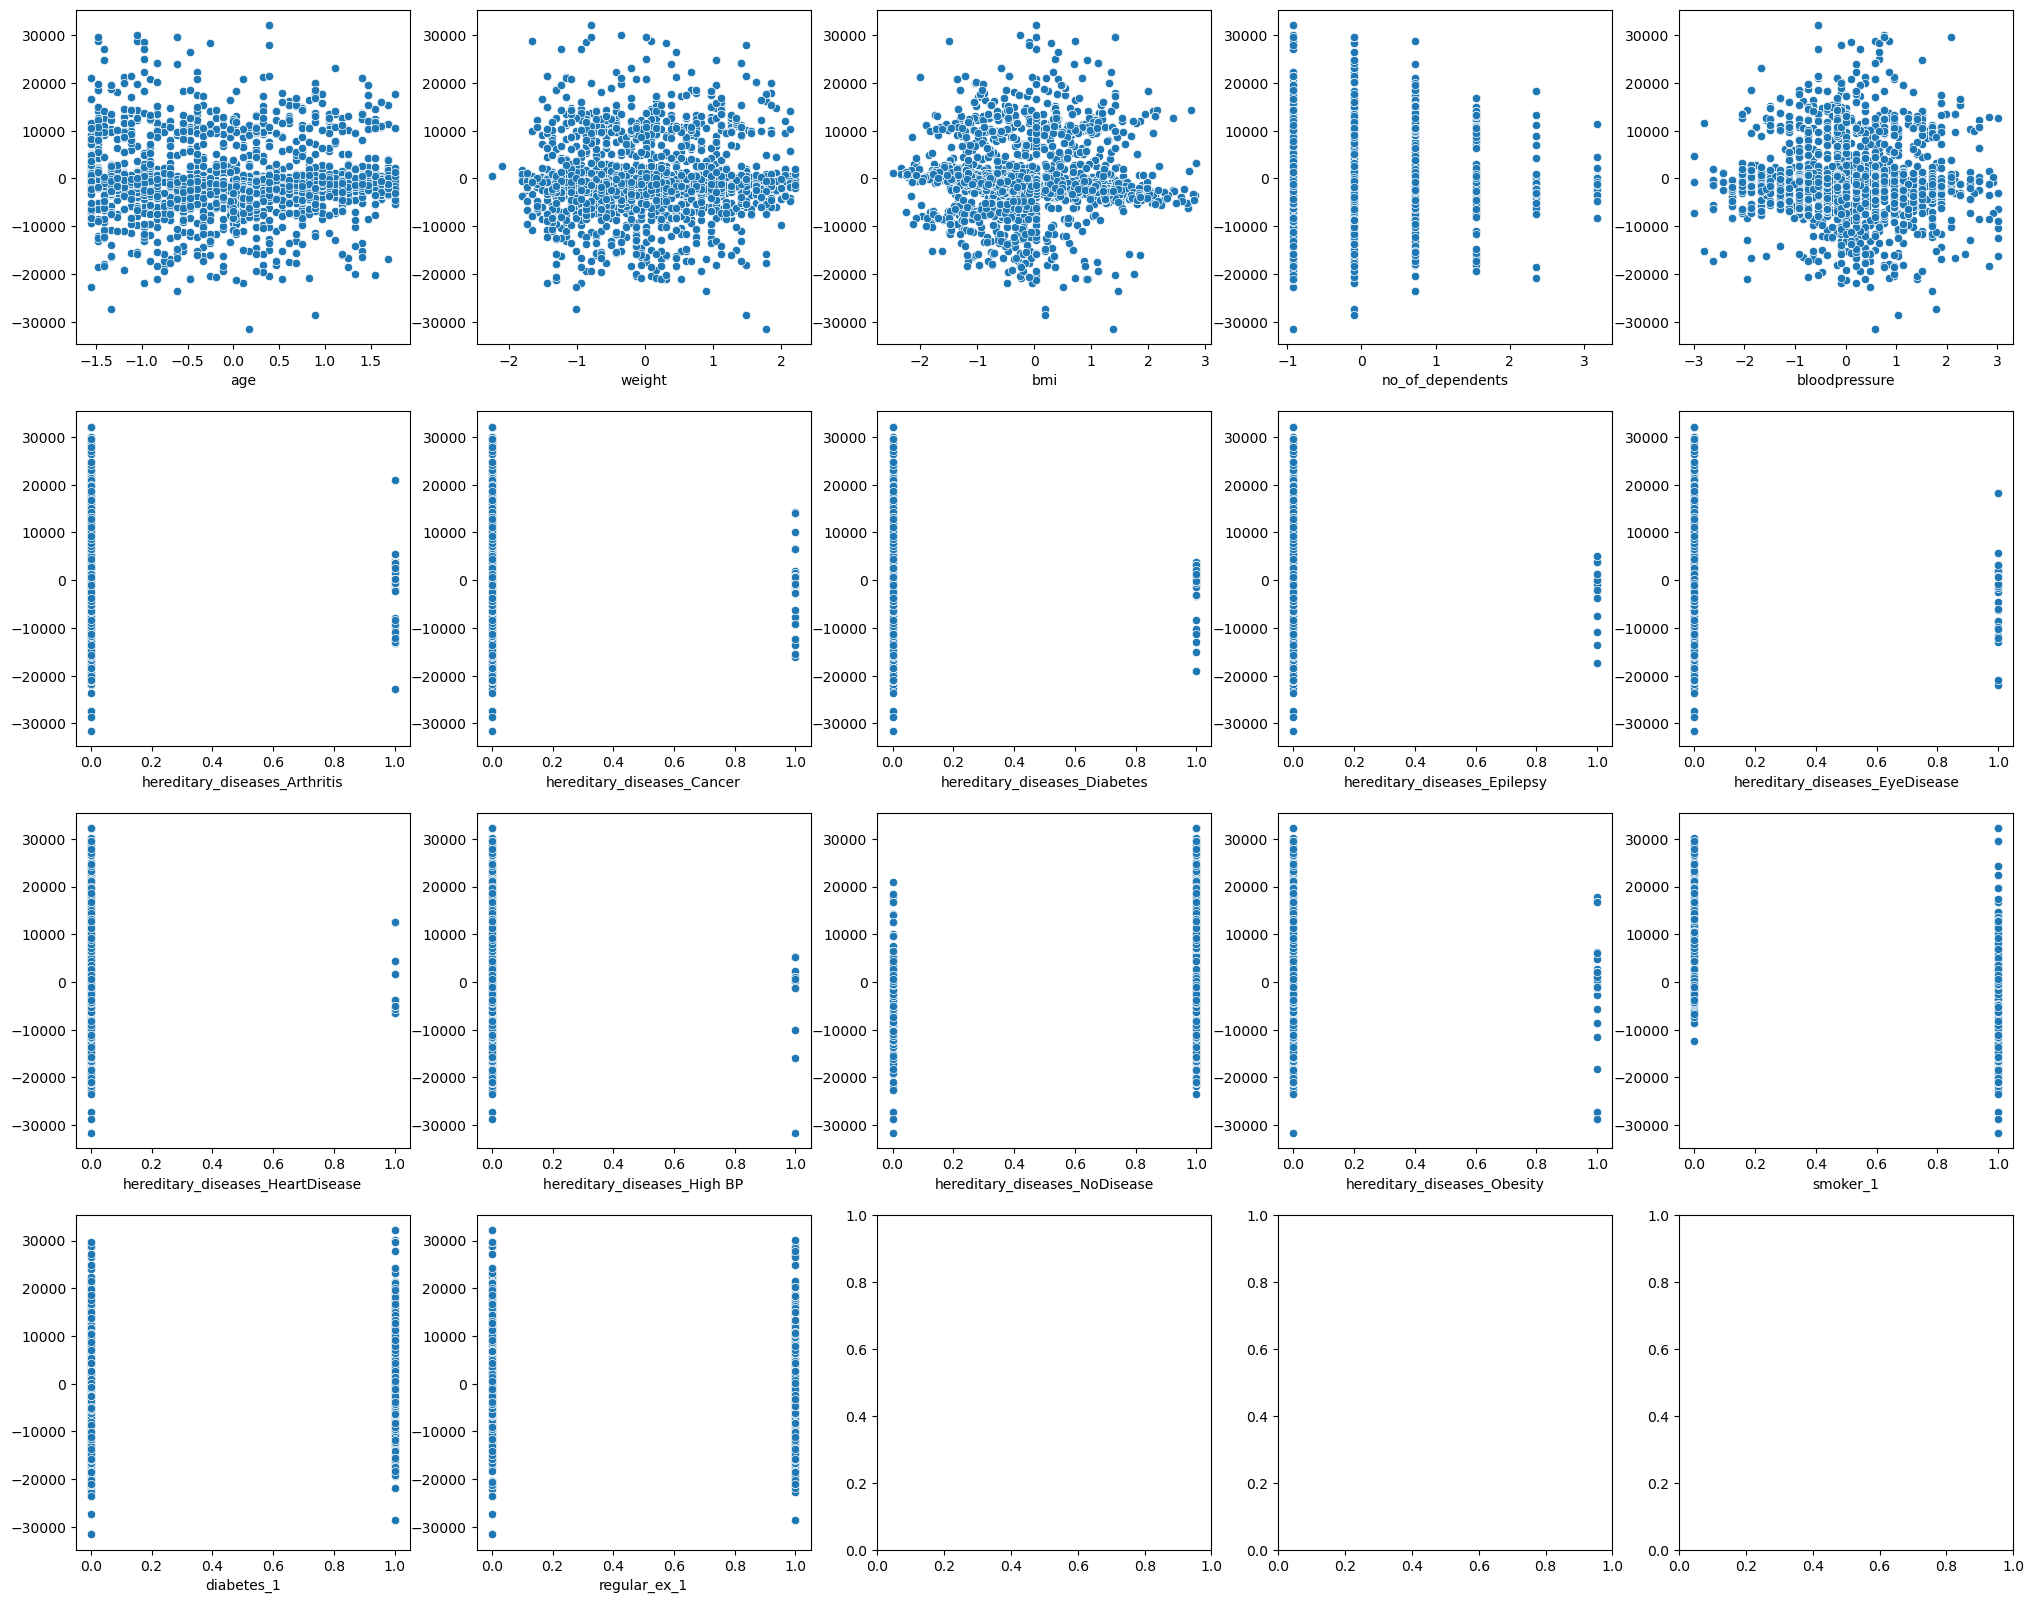

In [79]:
# create subplots of scatter plots

fig, ax = plt.subplots(nrows = 4, ncols= 5, figsize=(25, 20))

# use for loop to create scatter plot for residuals and each independent variable (do not consider the intercept)
# 'ax' assigns axes object to draw the plot onto 
for variable, subplot in zip(X_train_significant.columns[1:], ax.flatten()):
    sns.scatterplot(x=X_train_significant[variable], y=linreg_model_with_significant_var.resid , ax=subplot)

plt.show()

From the plots we see that none of the plots show a specific pattern. Hence, we may conclude that the variables are linearly related to the dependent variable.

<a id='Normality_of_Residuals'></a>
### 5.3.2.4 Normality of Residuals

The assumption of normality is an important assumption for many statistical tests. The normal Q-Q plot is one way to assess normality. This q-q or quantile-quantile is a scatter plot which helps us validate the assumption of normal distribution in a data set.

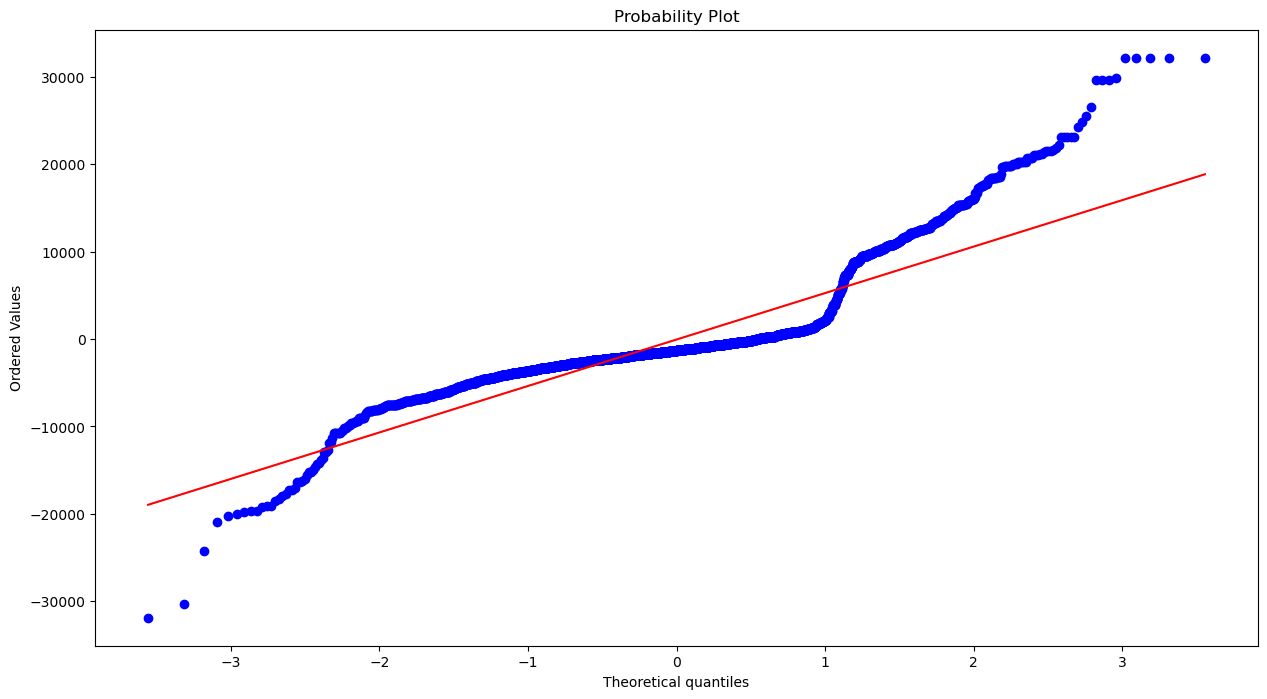

In [80]:
# calculate fitted values
fitted_vals = linreg_model_with_significant_var.predict(X_test_significant)

# calculate residuals
resids = actual_claim - fitted_vals

# fig, ax = plt.subplots(1, 1, figsize=(15, 8))

stats.probplot(resids, plot=plt)


plt.show()

Using this plot, we can infer that the residuals do not come from a normal distribution. Also Jarqque Bera test suggests residuals do not come from a normal distribution.
This is possible since our target variable is not normally distributed.

In [81]:
# check the mean of the residual
linreg_model_with_significant_var.resid.mean()

-8.397464574819197e-12

### 5.3.4 Linear Regression with Interaction (OLS)


**1. Compute the interaction effect**

In [82]:
# Bsed on domain knowledge - possible interaction between bmi and smoker
# create a copy of the entire dataset to add the interaction effect using copy()
df_insurance_interaction = df_insurance_dummy.copy()

# add the interaction variable
df_insurance_interaction['bmi*smoker'] = df_insurance_interaction['bmi']*df_insurance_interaction['smoker_1'] 
df_insurance_interaction.head()

,const,age,weight,bmi,no_of_dependents,bloodpressure,claim,log_claim,sex_male,hereditary_diseases_Arthritis,hereditary_diseases_Cancer,hereditary_diseases_Diabetes,hereditary_diseases_Epilepsy,hereditary_diseases_EyeDisease,hereditary_diseases_HeartDisease,hereditary_diseases_High BP,hereditary_diseases_NoDisease,hereditary_diseases_Obesity,smoker_1,diabetes_1,regular_ex_1,job_title_Accountant,job_title_Actor,job_title_Analyst,job_title_Architect,job_title_Beautician,job_title_Blogger,job_title_Buisnessman,job_title_CA,job_title_CEO,job_title_Chef,job_title_Clerks,job_title_Dancer,job_title_DataScientist,job_title_DefencePersonnels,job_title_Doctor,job_title_Engineer,job_title_Farmer,job_title_FashionDesigner,job_title_FilmDirector,job_title_FilmMaker,job_title_GovEmployee,job_title_HomeMakers,job_title_HouseKeeper,job_title_ITProfessional,job_title_Journalist,job_title_Labourer,job_title_Lawyer,job_title_Manager,job_title_Photographer,job_title_Police,job_title_Politician,job_title_Singer,job_title_Student,job_title_Technician,region_North-East,region_Southern,region_West,bmi*smoker
0,1.00,60.00,64.00,24.30,1.00,72.00,13112.60,9.48,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
1,1.00,49.00,75.00,22.60,1.00,78.00,9567.00,9.17,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
2,1.00,32.00,64.00,17.80,2.00,88.00,32734.20,10.40,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,17.80
3,1.00,61.00,53.00,36.40,1.00,72.00,48517.60,10.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,36.40
4,1.00,19.00,50.00,20.60,0.00,82.00,1731.70,7.46,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00


**2. Split the data into training and test sets**


In [83]:
# separate the independent and dependent variables

X = df_insurance_interaction.drop(['claim','log_claim'], axis=1)
y = df_insurance_interaction['claim']

# split data into train subset and test subset for predictor and target variables
X_train_interaction, X_test_interaction, y_train, y_test = train_test_split( X, y, random_state=1)

# check the dimensions of the train & test subset for 
print("The shape of X_train_interaction is:",X_train_interaction.shape)
print("The shape of X_test_interaction is:",X_test_interaction.shape)
print("The shape of y_train is:",y_train.shape)
print("The shape of y_test is:",y_test.shape)

The shape of X_train_interaction is: (11042, 57)
The shape of X_test_interaction is: (3681, 57)
The shape of y_train is: (11042,)
The shape of y_test is: (3681,)


**3. Build model using sm.OLS().fit()**

In [84]:
# building a full model with an interaction term using OLS()
linreg_with_interaction = sm.OLS(y_train, X_train_interaction).fit()

# print the summary output
print(linreg_with_interaction.summary())

                            OLS Regression Results                            
Dep. Variable:                  claim   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     796.1
Date:                Fri, 24 May 2024   Prob (F-statistic):               0.00
Time:                        16:47:37   Log-Likelihood:            -1.1055e+05
No. Observations:               11042   AIC:                         2.212e+05
Df Residuals:                   10985   BIC:                         2.216e+05
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

**4. Predict the values using test set**

In [85]:
# predict the 'claim' using predict()
predicted_claim = linreg_with_interaction.predict(X_test_interaction)

# extract the 'claim' values from the test data
actual_claim = y_test

**5. Compute model accuracy measures**


In [86]:
# calculate rmse using rmse()
linreg_with_interaction_rmse = rmse(actual_claim, predicted_claim)

# calculate R-squared using rsquared
linreg_with_interaction_rsquared = linreg_with_interaction.rsquared

# calculate Adjusted R-Squared using rsquared_adj
linreg_with_interaction_rsquared_adj = linreg_with_interaction.rsquared_adj 

**6. Tabulate the results**

In [87]:
linreg_with_interaction_rmse = linreg_with_interaction_rmse
linreg_with_interaction_rsquared = linreg_with_interaction_rsquared
linreg_with_interaction_rsquared_adj = linreg_with_interaction_rsquared_adj

# Compile the required information into a DataFrame
linreg_with_interaction_metrics = pd.DataFrame({
    'Model_Name': ["Linreg with interaction"],
    'RMSE': [linreg_with_interaction_rmse],
    'R-Squared': [linreg_model_with_significant_var_rsquared],
    'Adj. R-Squared': [linreg_with_interaction_rsquared_adj]
    # 'Test_R-Squared': [linreg_full_model_withlog_test_rsquared]    # for Test-RSquared
})

# Create an initial score_card DataFrame (if it doesn't exist already)
# Assuming the initial DataFrame is empty with the same columns
columns = ['Model_Name', 'RMSE', 'R-Squared', 'Adj. R-Squared']
score_card = pd.DataFrame(columns=columns)

# Append the new row using pd.concat
score_card = pd.concat([score_card, linreg_with_interaction_metrics], ignore_index=True)

score_card


,Model_Name,RMSE,R-Squared,Adj. R-Squared
0,Linreg with interaction,5547.06,0.76,0.80


## 6. Regularization (OLS)

### 6.1 Ridge Regression (OLS)

**1. Define train and test sets**

In [88]:
print("The shape of X_train_interaction is:",X_train_interaction.shape)
print("The shape of X_test_interaction is:",X_test_interaction.shape)
print("The shape of y_train is:",y_train.shape)
print("The shape of y_test is:",y_test.shape)

The shape of X_train_interaction is: (11042, 57)
The shape of X_test_interaction is: (3681, 57)
The shape of y_train is: (11042,)
The shape of y_test is: (3681,)


In [89]:
X_train_interaction_No_const = X_train_interaction.drop('const', axis=1)
X_test_interaction_No_const = X_test_interaction.drop('const', axis=1)

# check shate after drop of constant
print("The shape of X_train_interaction is:",X_train_interaction_No_const.shape)
print("The shape of X_test_interaction is:",X_test_interaction_No_const.shape)

The shape of X_train_interaction is: (11042, 56)
The shape of X_test_interaction is: (3681, 56)


**2. Perform Grid Search to identify Best Parameter**

We first create a list of all the variable names and accuracy metrics whose values we want.

In [90]:
# Define parameter grid
param = {'alpha':[0.01, 0.1, 0.5, 1, 2, 3, 4]}

# Create instance of algorithm
algo_name = Ridge()

grid_cv = GridSearchCV(estimator=algo_name, param_grid= param, cv=5, scoring='r2' )
grid_cv.fit(X_train_interaction_No_const, y_train)
grid_cv.best_params_

{'alpha': 2}

**3. Build model with Best Parameters**

In [91]:
# build Ridge model with best parameter from grid search

# Use Normalize=True
ridge_regression = Ridge(alpha=2)
ridge_model = ridge_regression.fit(X_train_interaction_No_const, y_train)


**4. Predict the values using test set**

In [92]:
# predict the scaled claim using predict()
train_predicted_claim = ridge_model.predict(X_train_interaction_No_const)
predicted_claim = ridge_model.predict(X_test_interaction_No_const)

# extract the 'claim' values from the test data
actual_claim = y_test

**5. Compute model accuracy measures**



In [93]:
# calculate rmse using rmse()
ridge_regression_rmse = rmse(actual_claim, predicted_claim)

# calculate R-squared using rsquared
ridge_regression_rsquared = r2_score(y_train, train_predicted_claim)
# ridge_regression_test_rsquared = test_r2 = r2_score(actual_claim, predicted_claim)

# calculate Adjusted R-Squared using rsquared_adj 
# compute number of observations
n = X_train_interaction_No_const.shape[0]
# compute number of independent variables
k = X_train_interaction_No_const.shape[1]
ridge_regression_rsquared_adj = 1 - (1 - ridge_regression_rsquared)*(n-1)/(n-k-1)


In [94]:
# Discuss the above Adj R2

**6. Tabulate the results**

In [95]:
ridge_regression_rmse = ridge_regression_rmse
ridge_regression_rsquared = ridge_regression_rsquared
ridge_regression_rsquared_adj = ridge_regression_rsquared_adj

# Compile the required information into a DataFrame
ridge_regression_metrics = pd.DataFrame({
    'Model_Name': ["Linreg with interaction"],
    'RMSE': [ridge_regression_rmse],
    'R-Squared': [ridge_regression_rsquared],
    'Adj. R-Squared': [ridge_regression_rsquared_adj]
    # 'Test_R-Squared': [linreg_full_model_withlog_test_rsquared]    # for Test-RSquared
})

# Create an initial score_card DataFrame (if it doesn't exist already)
# Assuming the initial DataFrame is empty with the same columns
columns = ['Model_Name', 'RMSE', 'R-Squared', 'Adj. R-Squared']
score_card = pd.DataFrame(columns=columns)

# Append the new row using pd.concat
score_card = pd.concat([score_card, ridge_regression_metrics], ignore_index=True)

score_card


,Model_Name,RMSE,R-Squared,Adj. R-Squared
0,Linreg with interaction,5544.35,0.80,0.80


### 6.2 Lasso Regression (OLS)

**1. Define train and test sets**

We already have Train and Test data defined during Ridge


**2. Perform Grid Search to identify Best Parameter**

In [96]:
# Define parameter grid
param = {'alpha':[0.001, 0.01, 0.1, 0.5, 1]}

# Create instance of algorithm
algo_name = Lasso()

grid_cv = GridSearchCV(estimator=algo_name, param_grid= param, cv=5, scoring='r2' )
grid_cv.fit(X_train_interaction, y_train)
grid_cv.best_params_

{'alpha': 0.5}

**3. Build model with Best Parameters**

In [97]:
# Build Lassso model
lasso_regression = Lasso(alpha=0.5)
lasso_model = lasso_regression.fit(X_train_interaction_No_const, y_train)
lasso_model

Lasso(alpha=0.5)

**4. Predict the values using test set**

In [98]:
# predict the scaled claim using predict()
train_predicted_claim = lasso_model.predict(X_train_interaction_No_const)
predicted_claim = lasso_model.predict(X_test_interaction_No_const)

# extract the 'claim' values from the test data
actual_claim = y_test

**5. Compute model accuracy measures**



In [99]:
# calculate rmse using rmse()
lasso_regression_rmse = rmse(actual_claim, predicted_claim)

# calculate R-squared using rsquared
lasso_regression_rsquared = r2_score(y_train, train_predicted_claim)
# lasso_regression_test_rsquared = test_r2 = r2_score(actual_claim, predicted_claim)

# calculate Adjusted R-Squared using rsquared_adj 
# compute number of observations
n = X_train_interaction_No_const.shape[0]
# compute number of independent variables
k = X_train_interaction_No_const.shape[1]
lasso_regression_rsquared_adj = 1 - (1 - lasso_regression_rsquared)*(n-1)/(n-k-1)
lasso_regression_rsquared_adj

0.801297011477241

In [100]:
# Discuss Adj R2

**6. Tabulate the results**

In [101]:
lasso_regression_rmse = lasso_regression_rmse
lasso_regression_rsquared = lasso_regression_rsquared
lasso_regression_rsquared_adj = lasso_regression_rsquared_adj

# Compile the required information into a DataFrame
lasso_regression_metrics = pd.DataFrame({
    'Model_Name': ["Lasso Regression with Interaction"],
    'RMSE': [lasso_regression_rmse],
    'R-Squared': [lasso_regression_rsquared],
    'Adj. R-Squared': [lasso_regression_rsquared_adj]
    # 'Test_R-Squared': [linreg_full_model_withlog_test_rsquared]    # for Test-RSquared
})

# Create an initial score_card DataFrame (if it doesn't exist already)
# Assuming the initial DataFrame is empty with the same columns
columns = ['Model_Name', 'RMSE', 'R-Squared', 'Adj. R-Squared']
score_card = pd.DataFrame(columns=columns)

# Append the new row using pd.concat
score_card = pd.concat([score_card, lasso_regression_metrics], ignore_index=True)

score_card


,Model_Name,RMSE,R-Squared,Adj. R-Squared
0,Lasso Regression with Interaction,5544.98,0.80,0.80


In [102]:
# Discuss Adj R2 in the contexxt of Ridge, Lasso, ElasticNet

### 6.2 ElasticNet Regression

**1. Define train and test sets**

We already have Train and Test data defined during Ridge

**2. Perform Grid Search to identify Best Parameter**

In [103]:
# Define parameter grid
param = {'alpha':[0.0001, 0.001, 0.01, 0.1, 0.5, 1],
         'l1_ratio':[0.01,0.1,0.3,0.5,0.7, 0.9, 1]}

# Create instance of algorithm
algo_name = ElasticNet()

grid_cv = GridSearchCV(estimator=algo_name, param_grid= param, cv=5, scoring='r2' )
grid_cv.fit(X_train_interaction, y_train)
grid_cv.best_params_

{'alpha': 0.5, 'l1_ratio': 1}

**3. Build model with Best Parameters**

In [104]:
# build Gidge model with best parameter from grid search

# Use Normalize=True
elasticnet_regression = ElasticNet(alpha=0.5, l1_ratio=1)
elasticnet_model = elasticnet_regression.fit(X_train_interaction_No_const, y_train)


**4. Predict the values using test set**

In [105]:
# predict the scaled claim using predict()
train_predicted_claim = elasticnet_model.predict(X_train_interaction_No_const)
predicted_claim = elasticnet_model.predict(X_test_interaction_No_const)

# extract the 'claim' values from the test data
actual_claim = y_test

**5. Compute model accuracy measures**



In [106]:
# calculate rmse using rmse()
elasticnet_regression_rmse = rmse(actual_claim, predicted_claim)

# calculate R-squared using rsquared
elasticnet_regression_rsquared = r2_score(y_train, train_predicted_claim)
# elasticnet_regression_test_rsquared = test_r2 = r2_score(actual_claim, predicted_claim)

# calculate Adjusted R-Squared using rsquared_adj 
# compute number of observations
n = X_train_interaction_No_const.shape[0]
# compute number of independent variables
k = X_train_interaction_No_const.shape[1]
elasticnet_regression_rsquared_adj = 1 - (1 - elasticnet_regression_rsquared)*(n-1)/(n-k-1)


**6. Tabulate the results**

In [107]:
elasticnet_regression_rmse = elasticnet_regression_rmse
elasticnet_regression_rsquared = elasticnet_regression_rsquared
elasticnet_regression_rsquared_adj = elasticnet_regression_rsquared_adj

# Compile the required information into a DataFrame
elasticnet_regression_metrics = pd.DataFrame({
    'Model_Name': ["ElasticNet Regression with Interaction"],
    'RMSE': [elasticnet_regression_rmse],
    'R-Squared': [elasticnet_regression_rsquared],
    'Adj. R-Squared': [elasticnet_regression_rsquared_adj]
    # 'Test_R-Squared': [linreg_full_model_withlog_test_rsquared]    # for Test-RSquared
})

# Create an initial score_card DataFrame (if it doesn't exist already)
# Assuming the initial DataFrame is empty with the same columns
columns = ['Model_Name', 'RMSE', 'R-Squared', 'Adj. R-Squared']
score_card = pd.DataFrame(columns=columns)

# Append the new row using pd.concat
score_card = pd.concat([score_card, elasticnet_regression_metrics], ignore_index=True)

score_card


,Model_Name,RMSE,R-Squared,Adj. R-Squared
0,ElasticNet Regression with Interaction,5544.98,0.80,0.80


In [108]:
# Discuss Adj R2 in the context of Ridge, Lasso, ElasticNet

<a id='rmse_and_r-squared'></a>
## 8. Conclusion and Interpretation

To take the final conclusion, let us recall the result table again

In [109]:
# view the result table
score_card

,Model_Name,RMSE,R-Squared,Adj. R-Squared
0,ElasticNet Regression with Interaction,5544.98,0.80,0.80


# 9. Let's Go for a Non-Linear Model

Because in the linear model, we are getting an accuracy of approximately 80%, which is likely due to not all assumptions being satisfied.

# We will use the Random Forest algorithm.

In [110]:
from sklearn.preprocessing import LabelEncoder


for column in df_categoric_features:
    label_encoder = LabelEncoder()  # Initialize a new LabelEncoder for each column
    df_insurance[column] = label_encoder.fit_transform(df_insurance[column])


X = df_insurance.drop(['claim','log_claim'], axis=1)
y = df_insurance['claim']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [111]:
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint as sp_randint
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV

rf2 = RandomForestRegressor()


param_dist = { 'n_estimators':sp_randint(50,100),
              'max_features': sp_randint(1,14),
              'max_depth' : sp_randint(5,20),
             'min_samples_leaf':sp_randint(10,50),
              'min_samples_split':sp_randint(2,50)}


rsearch_rf  = RandomizedSearchCV(estimator=rf2, param_distributions = param_dist, cv=4, random_state=4) 

rsearch_rf.fit(X_train,y_train)
rsearch_rf.best_params_

{'max_depth': 19,
 'max_features': 11,
 'min_samples_leaf': 13,
 'min_samples_split': 2,
 'n_estimators': 71}

In [143]:
rf_tuned = RandomForestRegressor(**rsearch_rf.best_params_)

rf_tuned.fit(X_train,y_train)

ytrain_pred = rf_tuned.predict(X_train)
print('RMSE on train data: ', rmse(y_train, ytrain_pred)) 
print('R^2 on train data: ', r2_score(y_train, ytrain_pred))

ytest_pred = rf_tuned.predict(X_test)
print('RMSE on test data: ', rmse(y_test, ytest_pred))
print('R^2 on test data: ', r2_score(y_test, ytest_pred))

RMSE on train data:  2789.912231901719
R^2 on train data:  0.947104516553195
RMSE on test data:  3207.2774162987707
R^2 on test data:  0.9259208706864546


In [164]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error

xg = XGBRegressor(random_state=42, learning_rate=1, n_estimators=920, subsample=0.95, alpha=1,min_samples_leaf=15)
xg.fit(X_train, y_train)

ytrain_pred = xg.predict(X_train)

print('R^2 on train data: ', r2_score(y_train, ytrain_pred))

ytest_pred = xg.predict(X_test)

print('R^2 on test data: ', r2_score(y_test, ytest_pred))


R^2 on train data:  0.9999993962685584
R^2 on test data:  0.9651762802671813


In [114]:
df_insurance.head()

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,bloodpressure,diabetes,regular_ex,job_title,claim,region,log_claim
0,60.00,1,64,24.30,8,1,0,72,0,0,2,13112.60,1,9.48
1,49.00,0,75,22.60,8,1,0,78,1,1,16,9567.00,1,9.17
2,32.00,0,64,17.80,4,2,1,88,1,1,0,32734.20,1,10.40
3,61.00,0,53,36.40,8,1,1,72,1,0,10,48517.60,1,10.79
4,19.00,0,50,20.60,8,0,0,82,1,0,22,1731.70,1,7.46


In [115]:
X.head()

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,bloodpressure,diabetes,regular_ex,job_title,region
0,60.00,1,64,24.30,8,1,0,72,0,0,2,1
1,49.00,0,75,22.60,8,1,0,78,1,1,16,1
2,32.00,0,64,17.80,4,2,1,88,1,1,0,1
3,61.00,0,53,36.40,8,1,1,72,1,0,10,1
4,19.00,0,50,20.60,8,0,0,82,1,0,22,1


In [116]:
y.head()

0   13112.60
1    9567.00
2   32734.20
3   48517.60
4    1731.70
Name: claim, dtype: float64

In [147]:
X_train.shape

(11042, 12)

In [148]:
np.sqrt(11042)

105.08092119885512

In [154]:
11042/12

920.1666666666666